In [1]:
# import result data
import os
import csv

RESULT_PATH = "./results/"

In [2]:
### READ ALL PICKLES INTO DATAFRAME
import pandas as pd
import statistics
import pickle
import os


combined_peak_df = pd.DataFrame()
combined_nonpeak_df = pd.DataFrame()

for root, dirs, files in os.walk(RESULT_PATH):
    print(root, "old" in root)
    for i, file in enumerate(files):
        if file.endswith('.pkl') and "old" not in root:
            print(f"adding {file}\tfrom: {root}")
            file_path = os.path.join(root, file)
            with open(file_path, 'rb') as f:
                df = pickle.load(f)
                if "nonpeak" in file_path:
                    print(f"adding {file} in nonpeak\n")
                    combined_nonpeak_df = pd.concat([combined_nonpeak_df,df], ignore_index=True)
                else:
                    print(f"adding {file} in peak\n")
                    combined_peak_df = pd.concat([combined_peak_df, df], ignore_index=True)

peak_count = len(combined_peak_df)
nonpeak_count= len(combined_nonpeak_df)
print(peak_count, nonpeak_count)

./results/ False
./results/peak-28-06-2023_15hh_45mm_TO_28-06-2023_16hh_35mm False
adding 0_combined_pickle.pkl	from: ./results/peak-28-06-2023_15hh_45mm_TO_28-06-2023_16hh_35mm
adding 0_combined_pickle.pkl in peak

./results/peak-28-06-2023_20hh_40mm_TO_28-06-2023_21hh_14mm False
adding 0_combined_pickle.pkl	from: ./results/peak-28-06-2023_20hh_40mm_TO_28-06-2023_21hh_14mm
adding 0_combined_pickle.pkl in peak

./results/peak-28-06-2023_10hh_32mm_TO_28-06-2023_15hh_42mm False
adding 0_combined_pickle.pkl	from: ./results/peak-28-06-2023_10hh_32mm_TO_28-06-2023_15hh_42mm
adding 0_combined_pickle.pkl in peak

./results/nonpeak-28-06-2023_06hh_17mm_TO_28-06-2023_10hh_31mm False
adding 0_combined_pickle.pkl	from: ./results/nonpeak-28-06-2023_06hh_17mm_TO_28-06-2023_10hh_31mm
adding 0_combined_pickle.pkl in nonpeak

./results/peak-28-06-2023_21hh_23mm_TO_28-06-2023_22hh_39mm False
adding 0_combined_pickle.pkl	from: ./results/peak-28-06-2023_21hh_23mm_TO_28-06-2023_22hh_39mm
adding 0_combined

In [3]:
df = pd.concat([combined_nonpeak_df, combined_nonpeak_df])

pop_to_all_ips = {}
pop_to_ip = {}

cf_pop = df['X-Amz-Cf-Pop'].tolist()
cf_ip = df['responseIP'].tolist()
for pop, ip in zip(cf_pop, cf_ip):
    if pop in pop_to_all_ips:
        ips = pop_to_all_ips[pop]
        ips.append(ip)
        pop_to_all_ips[pop] = ips
    else:
        pop_to_all_ips[pop] = [ip]


for pop, ips in pop_to_all_ips.items():
    if pop not in pop_to_ip:
        ip = statistics.mode(ips)
        pop_to_ip[pop] = ip
        print (f"'{pop}' : '{ip}',")

'FRA52-M2' : '54.182.219.109',
'FRA51-M1' : '54.182.218.107',
'FRA54-M3' : '54.182.220.110',
'SFO20-M2' : '54.240.130.103',
' ' : ' ',
'SFO5-M1' : '54.240.129.101',
'SFO50-M3' : '54.240.131.120',
'ZRH55-P1' : '18.165.183.81',
'ZRH50-C1' : '13.224.103.28',
'MXP64-P2' : '108.138.199.35',
'MXP64-C2' : '99.86.159.123',
'MXP64-C3' : '2600:9000:2176:ce00:1d:5c8:7b00:93a1',
'MXP63-P2' : '2600:9000:2247:6200:12:2062:3100:21',
'MXP64-P1' : '2600:9000:248c:b400:12:2062:3100:21',
'MXP63-P4' : '2600:9000:2249:1c00:1d:5c8:7b00:93a1',
'MXP53-P3' : '2600:9000:25eb:6e00:12:9d20:9180:21',
'MXP64-C1' : '143.204.14.163',
'MXP63-P3' : '108.139.243.102',
'MXP63-P1' : '18.66.200.85',
'MXP53-P1' : '2600:9000:25e9:5e00:14:6c65:4300:21',
'LHR50-M1' : '54.182.235.108',
'LHR61-M2' : '54.182.171.117',
'LHR62-M3' : '54.182.190.107',
'AMS51-M1' : '54.182.215.117',
'AMS53-M3' : '54.182.217.105',
'AMS52-M2' : '54.182.216.100',
'LHR52-M3' : '54.182.200.101',
'LHR4-M1' : '54.182.198.118',
'LHR51-M2' : '54.182.199.112',

In [4]:
df = combined_peak_df

prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
haystack_top10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

for i, x in enumerate(prime_top10_df["content"].unique()):
    print(i+1,x)


1 Medellin_url_top_movies.csv
2 Creed_url_top_movies.csv
3 AIR_url_top_movies.csv
4 Samaritan_url_top_movies.csv
5 Ultimo  Vivo coi sogni appesi_url_top_movies.csv
6 My Fault_url_top_movies.csv
7 Creed III_url_top_movies.csv
8 No Time to Die_url_top_movies.csv
9 Citadel_url_top_tv.csv
10 Tom Clancys Without Remorse_url_top_movies.csv


AVERAGE LATENCY (PEAK):
prime_top10: 5.624317884720636
prime_bottom10: 41.7636897529733
pbs_10: 7.418568443418545
pbs_bottom10: 7.294656599067204
haystack_top10: 7.1506139574619505
haystack_bottom10: 7.13076904455196
mycontent: 6.82059640792719


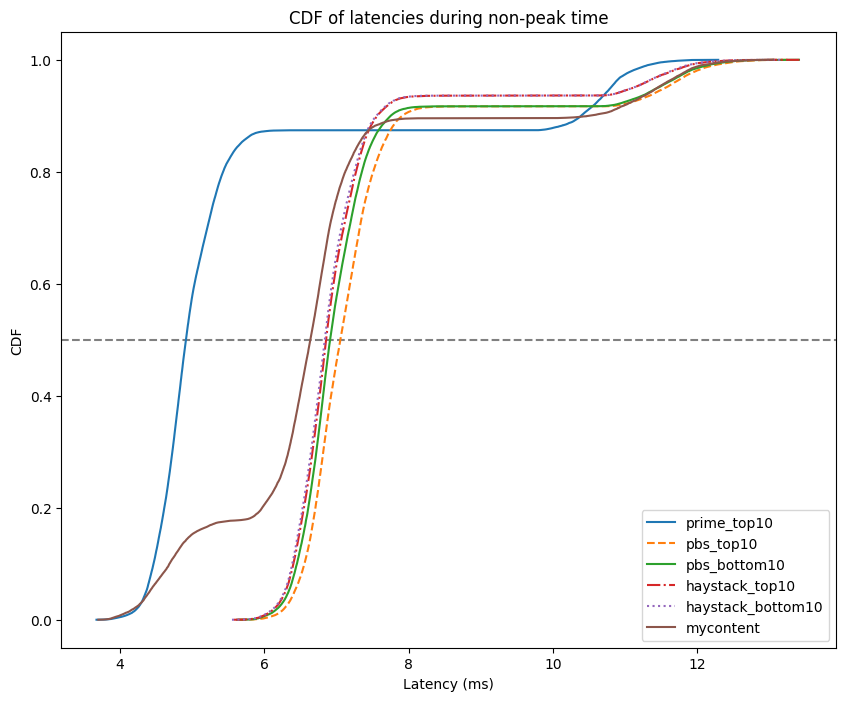

In [26]:
### LATENCY CDF DURING NON-PEAK TIME
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.options.mode.chained_assignment = None

# filter content into dfs
df = combined_nonpeak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

# Calculate the CDF values
prime_top10_df['latency(ms)'] = pd.to_numeric(prime_top10_df['latency(ms)'], errors='coerce')
ecdf_prime_top10 = sm.distributions.ECDF(prime_top10_df['latency(ms)'])
x_prime_top10= sorted(prime_top10_df['latency(ms)'].unique())
y_prime_top10 = ecdf_prime_top10(x_prime_top10)

prime_bottom10_df['latency(ms)'] = pd.to_numeric(prime_bottom10_df['latency(ms)'], errors='coerce')
ecdf_prime_bottom10 = sm.distributions.ECDF(prime_bottom10_df['latency(ms)'])
x_prime_bottom10 = sorted(prime_bottom10_df['latency(ms)'].unique())
y_prime_bottom10 = ecdf_prime_bottom10(x_prime_bottom10)


pbs_top10_df['latency(ms)'] = pd.to_numeric(pbs_top10_df['latency(ms)'], errors='coerce')
ecdf_pbs_top10 = sm.distributions.ECDF(pbs_top10_df['latency(ms)'])
x_pbs_top10 = sorted(pbs_top10_df['latency(ms)'].unique())
y_pbs_top10 = ecdf_pbs_top10(x_pbs_top10)

pbs_bottom10_df['latency(ms)'] = pd.to_numeric(pbs_bottom10_df['latency(ms)'], errors='coerce')
ecdf_pbs_bottom10 = sm.distributions.ECDF(pbs_bottom10_df['latency(ms)'])
x_pbs_bottom10 = sorted(pbs_bottom10_df['latency(ms)'].unique())
y_pbs_bottom10 = ecdf_pbs_bottom10(x_pbs_bottom10)


haystack_top10_df['latency(ms)'] = pd.to_numeric(haystack_top10_df['latency(ms)'], errors='coerce')
ecdf_haystack_top10 = sm.distributions.ECDF(haystack_top10_df['latency(ms)'])
x_haystack_top10 = sorted(haystack_top10_df['latency(ms)'].unique())
y_haystack_top10 = ecdf_haystack_top10(x_haystack_top10)

haystack_bottom10_df['latency(ms)'] = pd.to_numeric(haystack_bottom10_df['latency(ms)'], errors='coerce')
ecdf_haystack_bottom10 = sm.distributions.ECDF(haystack_bottom10_df['latency(ms)'])
x_haystack_bottom10 = sorted(haystack_bottom10_df['latency(ms)'].unique())
y_haystack_bottom10 = ecdf_haystack_bottom10(x_haystack_bottom10)


mycontent_df['latency(ms)'] = pd.to_numeric(mycontent_df['latency(ms)'], errors='coerce')
ecdf_mycontent = sm.distributions.ECDF(mycontent_df['latency(ms)'])
x_mycontent = sorted(mycontent_df['latency(ms)'].unique())
y_mycontent = ecdf_mycontent(x_mycontent)


# Set the figure size
plt.figure(figsize=(10, 8))

# Calculate the averages
average_prime_top10 = prime_top10_df['latency(ms)'].mean()
average_prime_bottom10 = prime_bottom10_df['latency(ms)'].mean()
average_pbs_top10 = pbs_top10_df['latency(ms)'].mean()
average_pbs_bottom10 = pbs_bottom10_df['latency(ms)'].mean()
average_haystack_top10 = haystack_top10_df['latency(ms)'].mean()
average_haystack_bottom10 = haystack_bottom10_df['latency(ms)'].mean()
average_mycontent = mycontent_df['latency(ms)'].mean()
print(f"AVERAGE LATENCY (PEAK):\nprime_top10: {average_prime_top10}\nprime_bottom10: {average_prime_bottom10}")
print(f"pbs_10: {average_pbs_top10}\npbs_bottom10: {average_pbs_bottom10}\nhaystack_top10: {average_haystack_top10}\nhaystack_bottom10: {average_haystack_bottom10}\nmycontent: {average_mycontent}")

# Plot the median lines
plt.axhline(0.5, linestyle='--', color='grey')

# Set labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of latencies during non-peak time')

x_prime_top10 = np.sort(prime_top10_df['latency(ms)'])
cdf_prime_top10 = np.arange(1, len(x_prime_top10) + 1) / len(x_prime_top10)
plt.plot(x_prime_top10, cdf_prime_top10, linestyle='-', label='prime_top10')  # Solid line

x_prime_bottom10 = np.sort(prime_bottom10_df['latency(ms)'])
cdf_prime_bottom10 = np.arange(1, len(x_prime_bottom10) + 1) / len(x_prime_bottom10)
#plt.plot(x_prime_bottom10, cdf_prime_bottom10, linestyle='-.', label='prime_bottom10')  # Solid line


x_pbs_top10 = np.sort(pbs_top10_df['latency(ms)'])
cdf_pbs_top10 = np.arange(1, len(x_pbs_top10) + 1) / len(x_pbs_top10)
plt.plot(x_pbs_top10, cdf_pbs_top10, linestyle='--', label='pbs_top10')  # Solid line

x_pbs_bottom10 = np.sort(pbs_bottom10_df['latency(ms)'])
cdf_pbs_bottom10 = np.arange(1, len(x_pbs_bottom10) + 1) / len(x_pbs_bottom10)
plt.plot(x_pbs_bottom10, cdf_pbs_bottom10, linestyle='-', label='pbs_bottom10')  # Solid line


x_haystack_top10 = np.sort(haystack_top10_df['latency(ms)'])
cdf_haystack_top10 = np.arange(1, len(x_haystack_top10) + 1) / len(x_haystack_top10)
plt.plot(x_haystack_top10, cdf_haystack_top10, linestyle='-.', label='haystack_top10')  # Solid line

x_haystack_bottom10 = np.sort(haystack_bottom10_df['latency(ms)'])
cdf_haystack_bottom10 = np.arange(1, len(x_haystack_bottom10) + 1) / len(x_haystack_bottom10)
plt.plot(x_haystack_bottom10, cdf_haystack_bottom10, linestyle=':', label='haystack_bottom10')  # Solid line


x_mycontent_df = np.sort(mycontent_df['latency(ms)'])
cdf_mycontent = np.arange(1, len(x_mycontent_df) + 1) / len(x_mycontent_df)
plt.plot(x_mycontent_df, cdf_mycontent, linestyle='-', label='mycontent')  # Solid line

# Show the legend
plt.legend()

AVERAGE LATENCY (PEAK):
prime_top10: 8.744787211707092
prime_bottom10: 39.42470950652815
pbs_10: 9.649876967335258
pbs_bottom10: 9.548960584231354
haystack_top10: 9.849194821707039
haystack_bottom10: 9.820980008113125
mycontent: 9.666853509089256


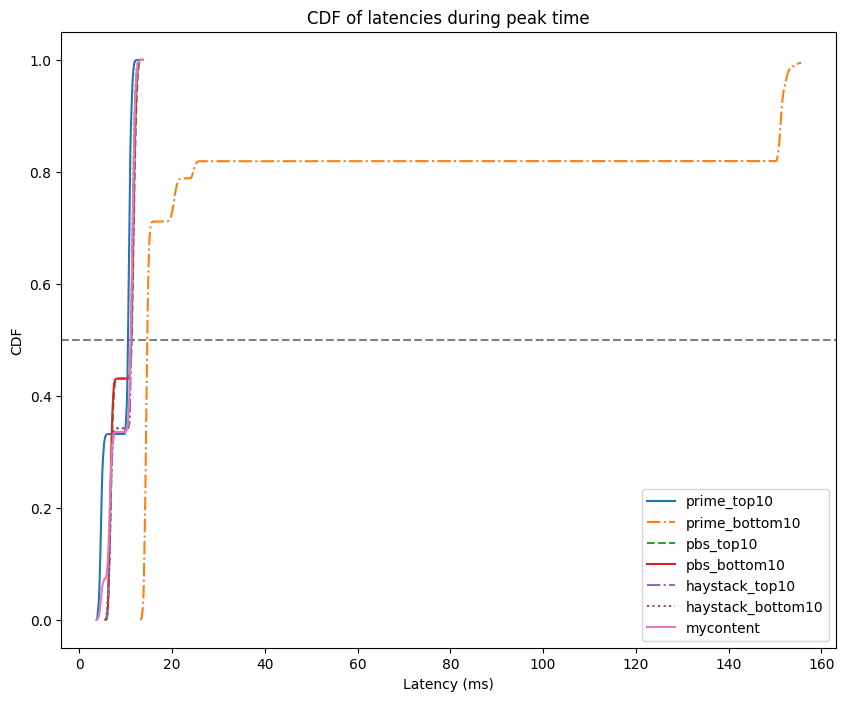

In [24]:
### LATENCY CDF DURING PEAK TIME
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.options.mode.chained_assignment = None

# filter content into dfs
df = combined_peak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

# Calculate the CDF values
prime_top10_df['latency(ms)'] = pd.to_numeric(prime_top10_df['latency(ms)'], errors='coerce')
ecdf_prime_top10 = sm.distributions.ECDF(prime_top10_df['latency(ms)'])
x_prime_top10= sorted(prime_top10_df['latency(ms)'].unique())
y_prime_top10 = ecdf_prime_top10(x_prime_top10)

prime_bottom10_df['latency(ms)'] = pd.to_numeric(prime_bottom10_df['latency(ms)'], errors='coerce')
ecdf_prime_bottom10 = sm.distributions.ECDF(prime_bottom10_df['latency(ms)'])
x_prime_bottom10 = sorted(prime_bottom10_df['latency(ms)'].unique())
y_prime_bottom10 = ecdf_prime_bottom10(x_prime_bottom10)


pbs_top10_df['latency(ms)'] = pd.to_numeric(pbs_top10_df['latency(ms)'], errors='coerce')
ecdf_pbs_top10 = sm.distributions.ECDF(pbs_top10_df['latency(ms)'])
x_pbs_top10 = sorted(pbs_top10_df['latency(ms)'].unique())
y_pbs_top10 = ecdf_pbs_top10(x_pbs_top10)

pbs_bottom10_df['latency(ms)'] = pd.to_numeric(pbs_bottom10_df['latency(ms)'], errors='coerce')
ecdf_pbs_bottom10 = sm.distributions.ECDF(pbs_bottom10_df['latency(ms)'])
x_pbs_bottom10 = sorted(pbs_bottom10_df['latency(ms)'].unique())
y_pbs_bottom10 = ecdf_pbs_bottom10(x_pbs_bottom10)


haystack_top10_df['latency(ms)'] = pd.to_numeric(haystack_top10_df['latency(ms)'], errors='coerce')
ecdf_haystack_top10 = sm.distributions.ECDF(haystack_top10_df['latency(ms)'])
x_haystack_top10 = sorted(haystack_top10_df['latency(ms)'].unique())
y_haystack_top10 = ecdf_haystack_top10(x_haystack_top10)

haystack_bottom10_df['latency(ms)'] = pd.to_numeric(haystack_bottom10_df['latency(ms)'], errors='coerce')
ecdf_haystack_bottom10 = sm.distributions.ECDF(haystack_bottom10_df['latency(ms)'])
x_haystack_bottom10 = sorted(haystack_bottom10_df['latency(ms)'].unique())
y_haystack_bottom10 = ecdf_haystack_bottom10(x_haystack_bottom10)


mycontent_df['latency(ms)'] = pd.to_numeric(mycontent_df['latency(ms)'], errors='coerce')
ecdf_mycontent = sm.distributions.ECDF(mycontent_df['latency(ms)'])
x_mycontent = sorted(mycontent_df['latency(ms)'].unique())
y_mycontent = ecdf_mycontent(x_mycontent)


# Set the figure size
plt.figure(figsize=(10, 8))

# Calculate the averages
average_prime_top10 = prime_top10_df['latency(ms)'].mean()
average_prime_bottom10 = prime_bottom10_df['latency(ms)'].mean()
average_pbs_top10 = pbs_top10_df['latency(ms)'].mean()
average_pbs_bottom10 = pbs_bottom10_df['latency(ms)'].mean()
average_haystack_top10 = haystack_top10_df['latency(ms)'].mean()
average_haystack_bottom10 = haystack_bottom10_df['latency(ms)'].mean()
average_mycontent = mycontent_df['latency(ms)'].mean()
print(f"AVERAGE LATENCY (PEAK):\nprime_top10: {average_prime_top10}\nprime_bottom10: {average_prime_bottom10}")
print(f"pbs_10: {average_pbs_top10}\npbs_bottom10: {average_pbs_bottom10}\nhaystack_top10: {average_haystack_top10}\nhaystack_bottom10: {average_haystack_bottom10}\nmycontent: {average_mycontent}")

# Plot the median lines
plt.axhline(0.5, linestyle='--', color='grey')

# Set labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of latencies during peak time')

x_prime_top10 = np.sort(prime_top10_df['latency(ms)'])
cdf_prime_top10 = np.arange(1, len(x_prime_top10) + 1) / len(x_prime_top10)
plt.plot(x_prime_top10, cdf_prime_top10, linestyle='-', label='prime_top10')  # Solid line

x_prime_bottom10 = np.sort(prime_bottom10_df['latency(ms)'])
cdf_prime_bottom10 = np.arange(1, len(x_prime_bottom10) + 1) / len(x_prime_bottom10)
plt.plot(x_prime_bottom10, cdf_prime_bottom10, linestyle='-.', label='prime_bottom10')  # Solid line


x_pbs_top10 = np.sort(pbs_top10_df['latency(ms)'])
cdf_pbs_top10 = np.arange(1, len(x_pbs_top10) + 1) / len(x_pbs_top10)
plt.plot(x_pbs_top10, cdf_pbs_top10, linestyle='--', label='pbs_top10')  # Solid line

x_pbs_bottom10 = np.sort(pbs_bottom10_df['latency(ms)'])
cdf_pbs_bottom10 = np.arange(1, len(x_pbs_bottom10) + 1) / len(x_pbs_bottom10)
plt.plot(x_pbs_bottom10, cdf_pbs_bottom10, linestyle='-', label='pbs_bottom10')  # Solid line


x_haystack_top10 = np.sort(haystack_top10_df['latency(ms)'])
cdf_haystack_top10 = np.arange(1, len(x_haystack_top10) + 1) / len(x_haystack_top10)
plt.plot(x_haystack_top10, cdf_haystack_top10, linestyle='-.', label='haystack_top10')  # Solid line

x_haystack_bottom10 = np.sort(haystack_bottom10_df['latency(ms)'])
cdf_haystack_bottom10 = np.arange(1, len(x_haystack_bottom10) + 1) / len(x_haystack_bottom10)
plt.plot(x_haystack_bottom10, cdf_haystack_bottom10, linestyle=':', label='haystack_bottom10')  # Solid line


x_mycontent_df = np.sort(mycontent_df['latency(ms)'])
cdf_mycontent = np.arange(1, len(x_mycontent_df) + 1) / len(x_mycontent_df)
plt.plot(x_mycontent_df, cdf_mycontent, linestyle='-', label='mycontent')  # Solid line

# Show the legend
plt.legend()

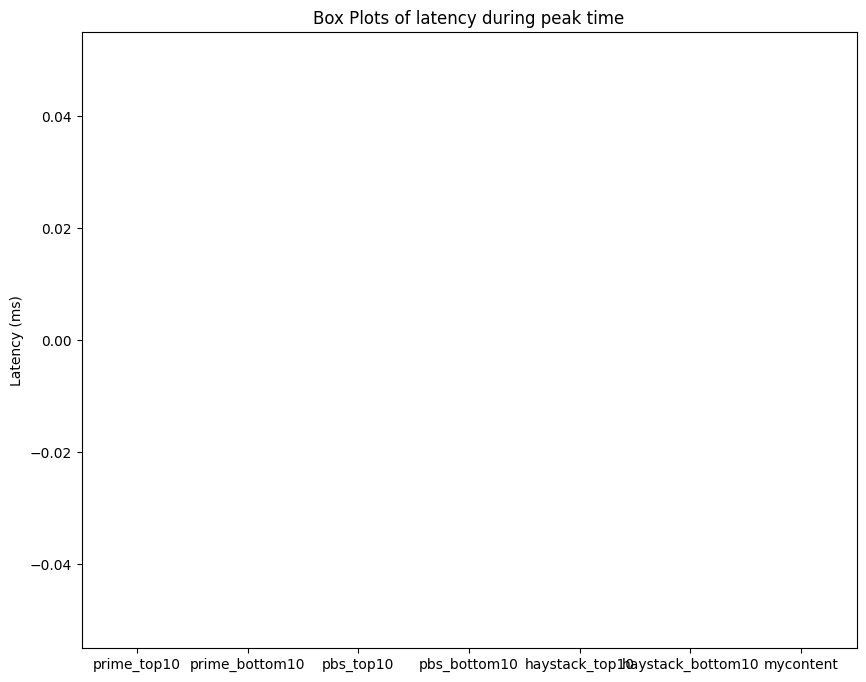

In [29]:
### BOXPLOT OF LATENCIES DURING PEAK-TIME
import matplotlib.pyplot as plt

# filter content into dfs
df = combined_peak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

prime_top10_df['latency(ms)'] = pd.to_numeric(prime_top10_df['latency(ms)'], errors='coerce')
prime_bottom10_df['latency(ms)'] = pd.to_numeric(prime_bottom10_df['latency(ms)'], errors='coerce')
pbs_top10_df['latency(ms)'] = pd.to_numeric(pbs_top10_df['latency(ms)'], errors='coerce')
pbs_bottom10_df['latency(ms)'] = pd.to_numeric(pbs_bottom10_df['latency(ms)'], errors='coerce')
haystack_top10_df['latency(ms)'] = pd.to_numeric(haystack_top10_df['latency(ms)'], errors='coerce')
haystack_bottom10_df['latency(ms)'] = pd.to_numeric(haystack_bottom10_df['latency(ms)'], errors='coerce')
mycontent_df['latency(ms)'] = pd.to_numeric(mycontent_df['latency(ms)'], errors='coerce')

# Create a list of latency values for each DataFrame
latency_data = [
    prime_top10_df['latency(ms)'],
    prime_bottom10_df['latency(ms)'],
    pbs_top10_df['latency(ms)'],
    pbs_bottom10_df['latency(ms)'],
    haystack_top10_df['latency(ms)'],
    haystack_bottom10_df['latency(ms)'],
    mycontent_df['latency(ms)']
]

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plots
plt.boxplot(latency_data, showfliers=True, whis=100, meanline=True, showmeans=True, meanprops={'marker':'^', 'markerfacecolor':'red', 'markeredgecolor':'red'})

# Set x-axis tick labels
labels = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']
plt.xticks(range(1, len(labels) + 1), labels)

# Set labels and title
#plt.xlabel('Dataframes')
plt.ylabel('Latency (ms)')
plt.title('Box Plots of latency during peak time')

# Show the plot
plt.show()


*** AVG EDGE LATENCIES ***
LHR 20.58
MXP 11.4
AMS 24.74
FRA 14.45
SFO 151.4
ZRH 6.49


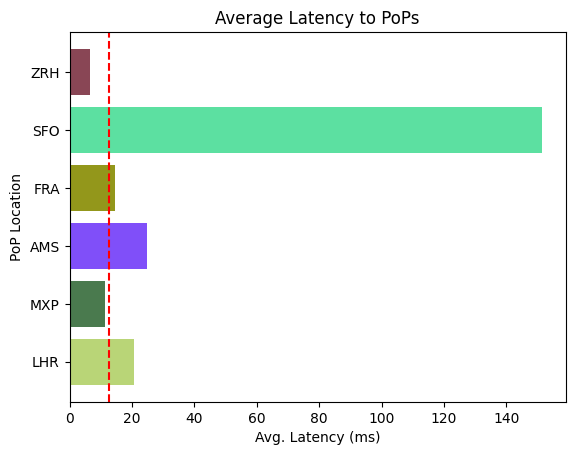

In [31]:
### AVERAGE POP LATENCY
import matplotlib.pyplot as plt
import numpy as np

# filter content into dfs
df = pd.concat([combined_peak_df, combined_nonpeak_df])

pops = df['X-Amz-Cf-Pop'].unique()
pops = set([pop[:3] for pop in pops])

edge_cities = []
latencies = []

print("*** AVG EDGE LATENCIES ***")
for pop in pops:
    pop = pop[:3]
    current_df = df[df['X-Amz-Cf-Pop'].str.contains(pop)]
    current_df['latency(ms)'] = pd.to_numeric(current_df['latency(ms)'], errors='coerce')
    mean_latency = round(current_df['latency(ms)'].mean(), 2)
    if pop != " ":
        print(pop, round(mean_latency, 2))
        edge_cities.append(pop)
        latencies.append(mean_latency)

# Overall average of all latencies
df['latency(ms)'] = pd.to_numeric(df['latency(ms)'], errors='coerce')
overall_average = round(df['latency(ms)'].mean(), 2)

# Generate random colors for the bars
colors = np.random.rand(len(edge_cities), 3)

# Plot the horizontal bar chart
plt.barh(edge_cities, latencies, color=colors)
plt.axvline(x=overall_average, color='r', linestyle='--', label='Overall Average')

# Set labels and title
plt.xlabel('Avg. Latency (ms)')
plt.ylabel('PoP Location')
plt.title('Average Latency to PoPs')

# Show the plot
plt.show()


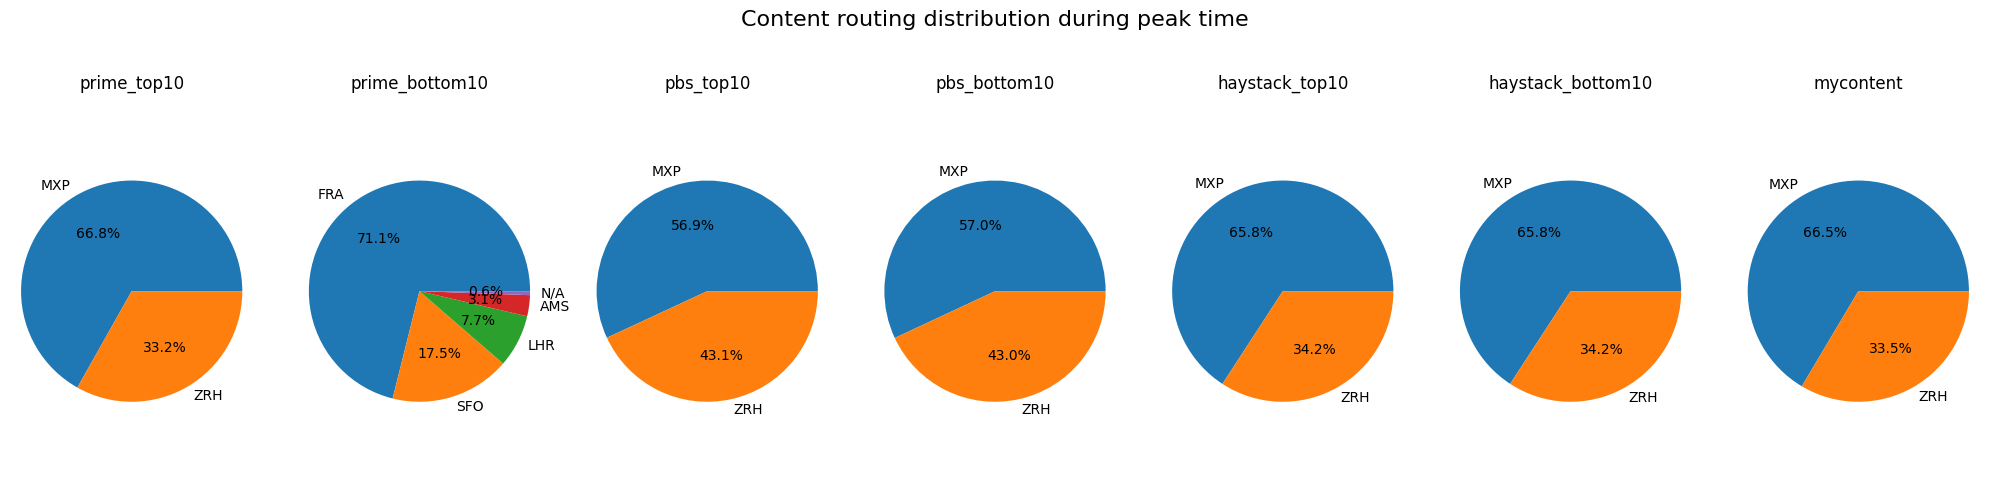

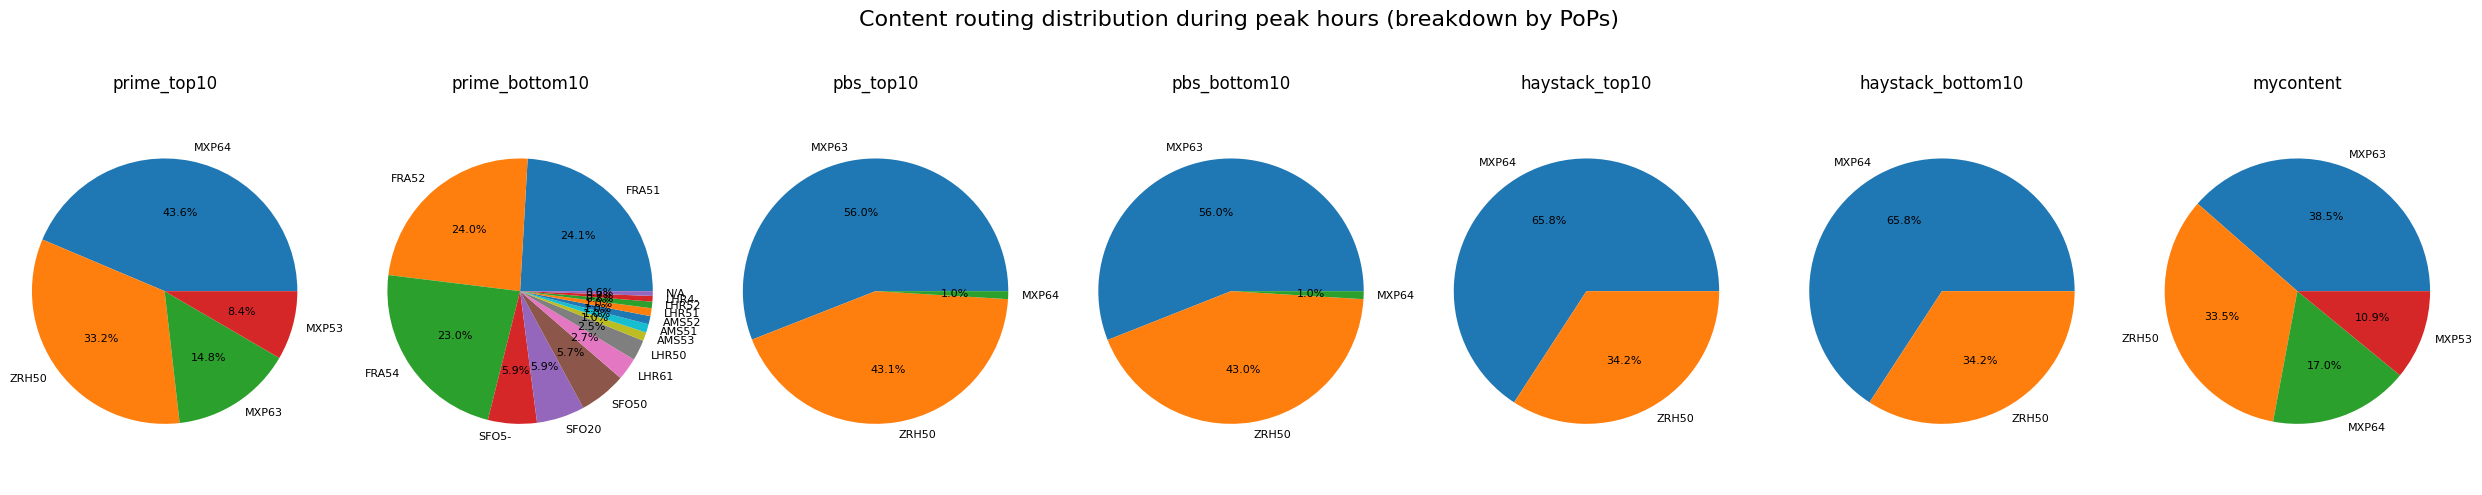

In [55]:
### ROUTING TO EDGE/POP DISTRIBUTION DURING PEAK TIME
import matplotlib.pyplot as plt

# filter content into dfs
df = combined_peak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']

# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str[:3]
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str.replace(" ", "N/A")
    city_counts = df['X-Amz-Cf-Pop'].value_counts()
    city_percentages = city_counts / len(df) * 100
    city_percentages = city_percentages[city_percentages >= 0.1]
    axs[i].pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 10})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Content routing distribution during peak time', fontsize=16)

# Adjust the spacing between subplots and legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


### PIE-CHART WITH FURTHER BREAKDOWN
df = combined_peak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

# Create list of dfs for pie charts
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']


# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str[:5]
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str.replace(" ", "N/A")
    city_counts = df['X-Amz-Cf-Pop'].value_counts()
    city_percentages = city_counts / len(df) * 100
    city_percentages = city_percentages[city_percentages >= 0.1]
    axs[i].pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 8})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Content routing distribution during peak hours (breakdown by PoPs)', fontsize=16)

# Adjust the spacing between subplots and legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


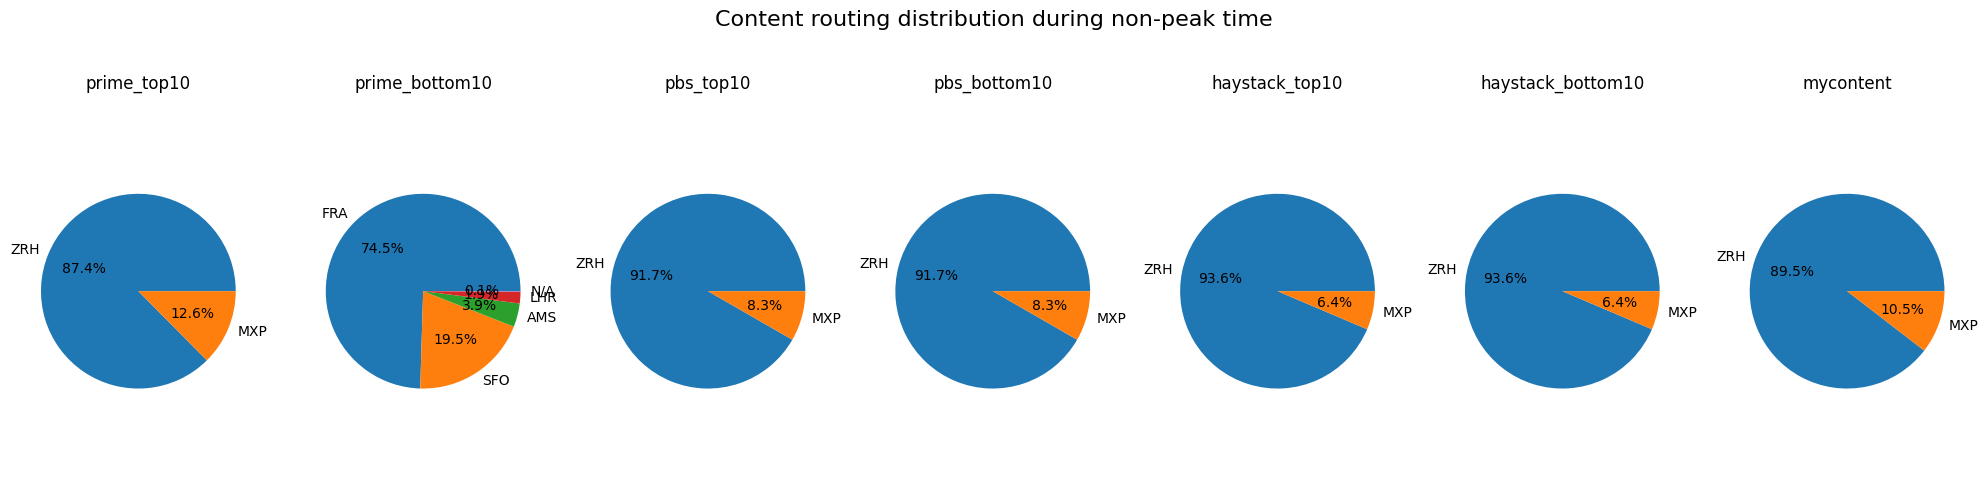

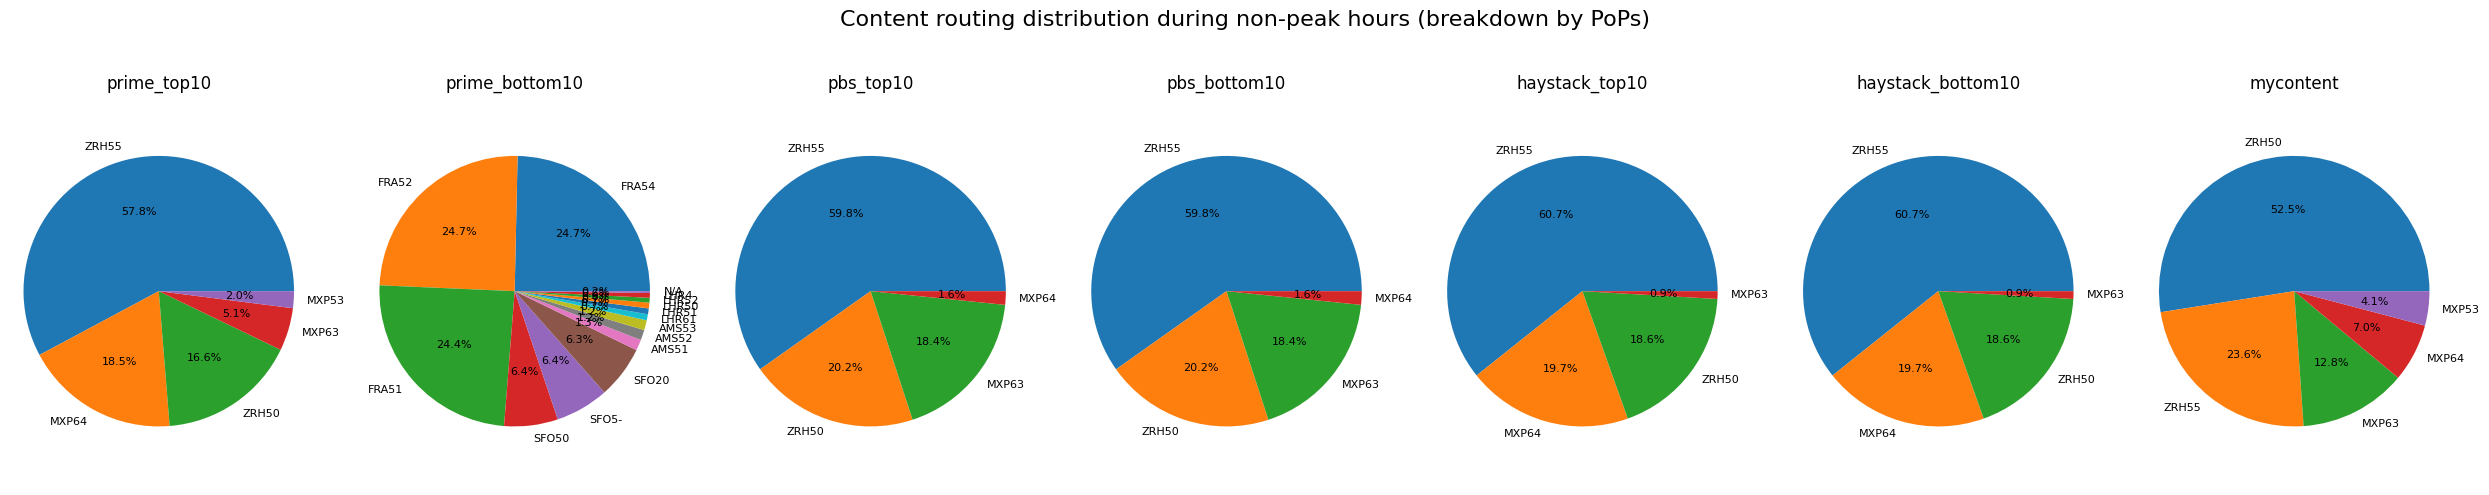

In [54]:
### ROUTING TO EDGE/POP DISTRIBUTION DURING NON-PEAK TIME
import matplotlib.pyplot as plt

# filter content into dfs
df = combined_nonpeak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']

# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str[:3]
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str.replace(" ", "N/A")
    city_counts = df['X-Amz-Cf-Pop'].value_counts()
    city_percentages = city_counts / len(df) * 100
    city_percentages = city_percentages[city_percentages >= 0.1]
    axs[i].pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 10})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Content routing distribution during non-peak time', fontsize=16)

# Adjust the spacing between subplots and legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


### PIE-CHART WITH FURTHER BREAKDOWN
#df = combined_nonpeak_df 
df = pd.concat([combined_nonpeak_df, combined_peak_df])
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

# Create list of dfs for pie charts
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']


# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str[:5]
    df['X-Amz-Cf-Pop'] = df['X-Amz-Cf-Pop'].str.replace(" ", "N/A")
    city_counts = df['X-Amz-Cf-Pop'].value_counts()
    city_percentages = city_counts / len(df) * 100
    city_percentages = city_percentages[city_percentages >= 0.1]
    axs[i].pie(city_percentages, labels=city_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 8})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Content routing distribution during non-peak hours (breakdown by PoPs)', fontsize=16)

# Adjust the spacing between subplots and legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


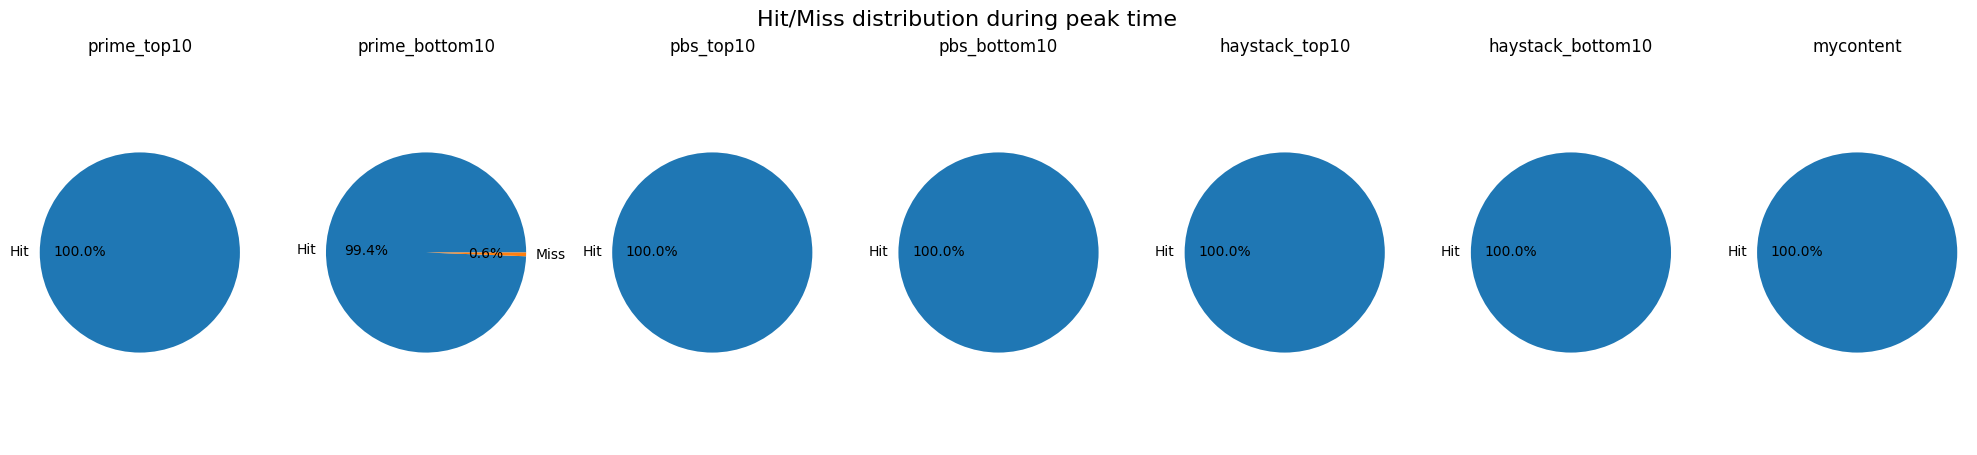

In [57]:
### HIT/MISS DISTRIBUTION DURING PEAK TIME
import matplotlib.pyplot as plt

# filter content into dfs
df = combined_peak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']

# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(25, 5))
fig.subplots_adjust(wspace=0.3, hspace=5)

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Cache'] = df['X-Cache'].str.replace(r'^\s*$', 'N/A', regex=True) # replace empty strings with N/A
    df['X-Cache'] = df['X-Cache'].str.replace('from cloudfront', '')
    df.loc[df['Age'] == " ", 'X-Cache'] = 'Miss' # if Age is empty, we consider it as a miss
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df.loc[df['Age'] > 0, 'X-Cache'] = 'Hit' # if Age > 0, we consider it as HIT
    hit_miss_counts = df['X-Cache'].value_counts()
    hit_miss_percentages = hit_miss_counts / len(df) * 100
    hit_miss_percentages = hit_miss_percentages[hit_miss_percentages >= 0.1]
    axs[i].pie(hit_miss_percentages, labels=hit_miss_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 10})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Hit/Miss distribution during peak time', fontsize=16)

# Show the plot
plt.show()

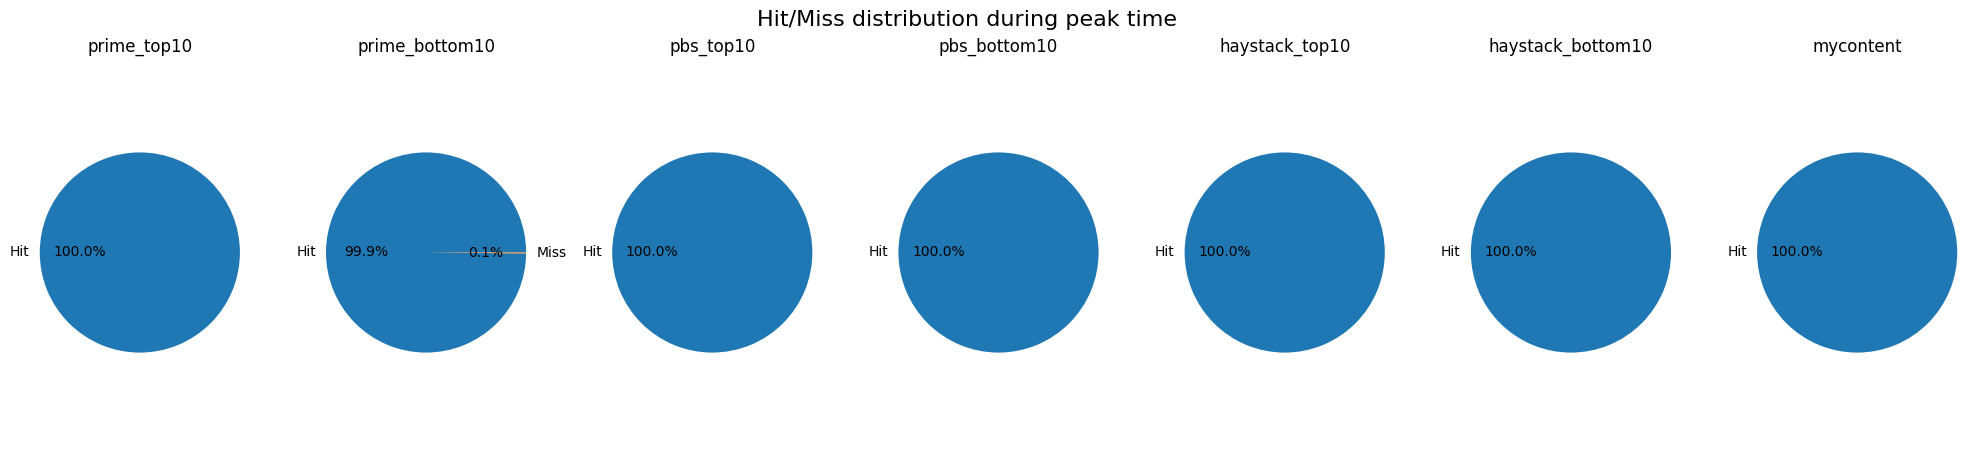

In [58]:
### HIT/MISS DISTRIBUTION DURING NON-PEAK TIME
import matplotlib.pyplot as plt

# filter content into dfs
df = combined_nonpeak_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
mycontent_df = df[df['content'].str.contains('_my_content')]

dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df, mycontent_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10', 'mycontent']

# Create a figure with 1 row and 5 columns of subplots
fig, axs = plt.subplots(1, 7, figsize=(25, 5))
fig.subplots_adjust(wspace=0.3, hspace=5)

# Iterate over the DataFrames and plot the pie charts
for i, df in enumerate(dfs):
    df['X-Cache'] = df['X-Cache'].str.replace(r'^\s*$', 'N/A', regex=True) # replace empty strings with N/A
    df['X-Cache'] = df['X-Cache'].str.replace('from cloudfront', '')
    df.loc[df['Age'] == " ", 'X-Cache'] = 'Miss' # if Age is empty, we consider it as a miss
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df.loc[df['Age'] > 0, 'X-Cache'] = 'Hit' # if Age > 0, we consider it as HIT
    hit_miss_counts = df['X-Cache'].value_counts()
    hit_miss_percentages = hit_miss_counts / len(df) * 100
    hit_miss_percentages = hit_miss_percentages[hit_miss_percentages >= 0.1]
    axs[i].pie(hit_miss_percentages, labels=hit_miss_percentages.index, autopct='%1.1f%%', textprops={'fontsize': 10})
    axs[i].set_title(f'{titles[i]}')
    axs[i].axis('equal')

# Add a title on top
fig.suptitle('Hit/Miss distribution during peak time', fontsize=16)

# Show the plot
plt.show()

Total: FRA51-M1 13 52 0 13.0000001  ->  20.000000153846152 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 10 0
Prime: FRA51-M1 0 10 0






Total: FRA54-M3 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: FRA54-M3 11 0 0
Haystack: FRA54-M3 10 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 10 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 16 49 0 16.0000001  ->  24.615384769230772 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 10 0
Prime: SFO50-M3 0 10 0






Total: SFO5-M1 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 10 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 10 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 16 49 0 16.0000001  ->  24.615384769230772 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 10 0
Prime: AMS51-M1 0 10 0






Total: AMS52-M2 65 0 0 65.0000001  ->  100.000000

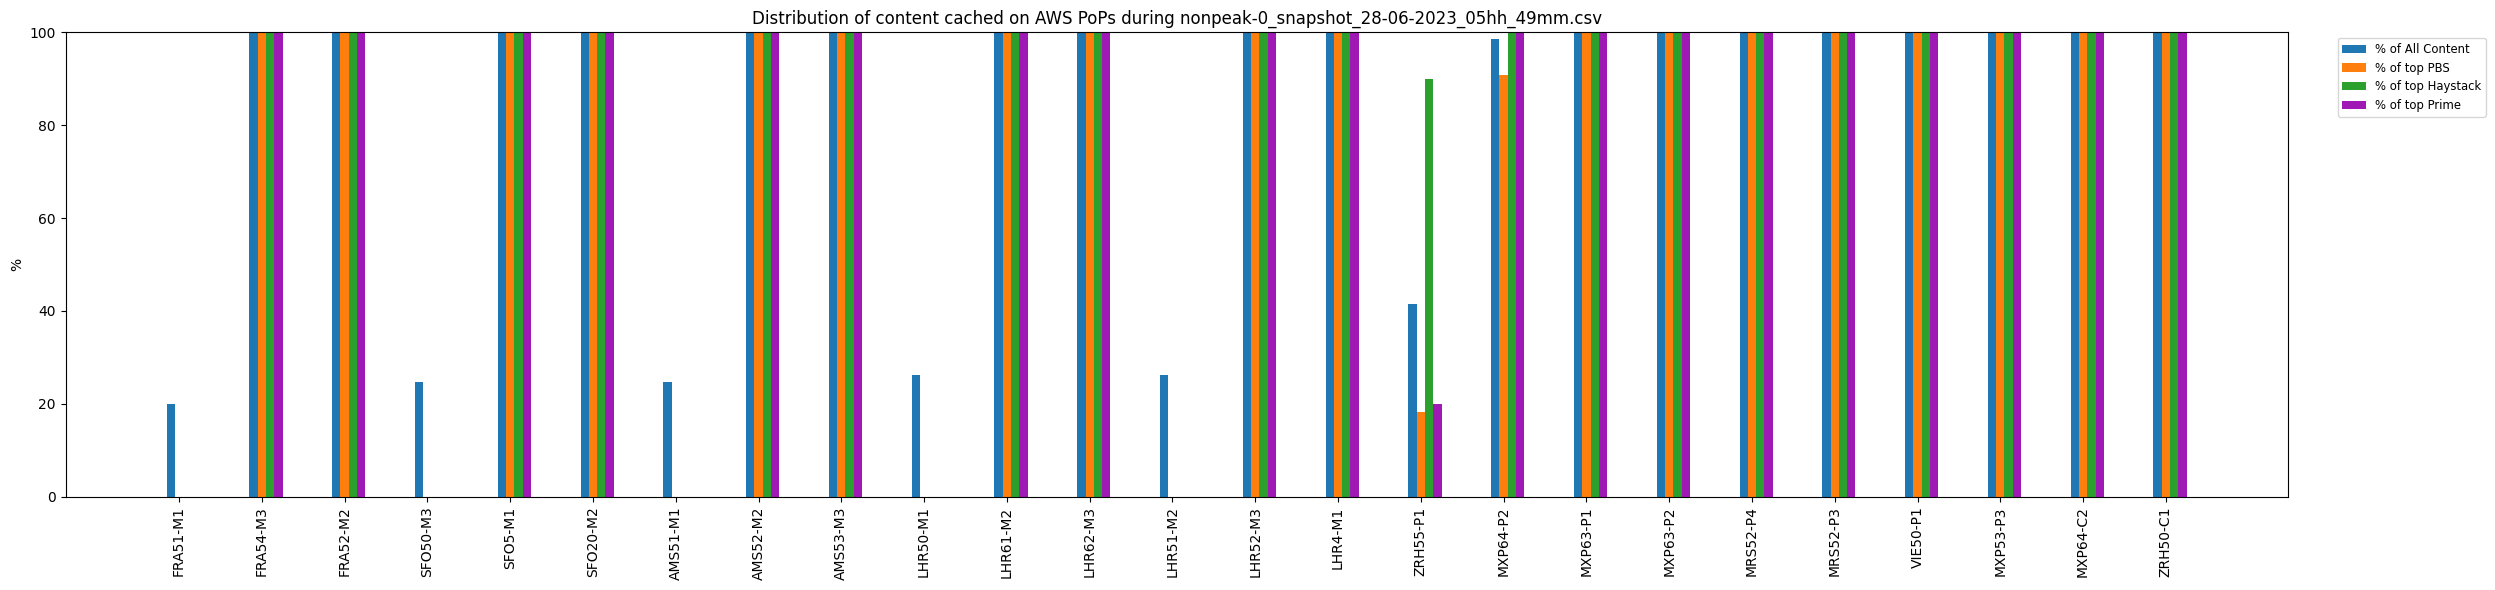

Total: FRA51-M1 1 58 0 1.0000007  ->  1.6949164406779662 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 5 0
Prime: FRA51-M1 0 9 0






Total: FRA54-M3 1 58 0 1.0000007  ->  1.6949164406779662 %
PBS: FRA54-M3 0 11 0
Haystack: FRA54-M3 0 5 0
Prime: FRA54-M3 0 9 0






Total: FRA52-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 5 0 0
Prime: FRA52-M2 9 0 0






Total: SFO50-M3 2 57 0 2.0000007  ->  3.3898316949152547 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 5 0
Prime: SFO50-M3 0 9 0






Total: SFO5-M1 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 5 0 0
Prime: SFO5-M1 9 0 0






Total: SFO20-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 5 0 0
Prime: SFO20-M2 9 0 0






Total: AMS51-M1 3 56 0 3.0000007  ->  5.084746949152542 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 5 0
Prime: AMS51-M1 0 9 0






Total: AMS52-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: AMS52-

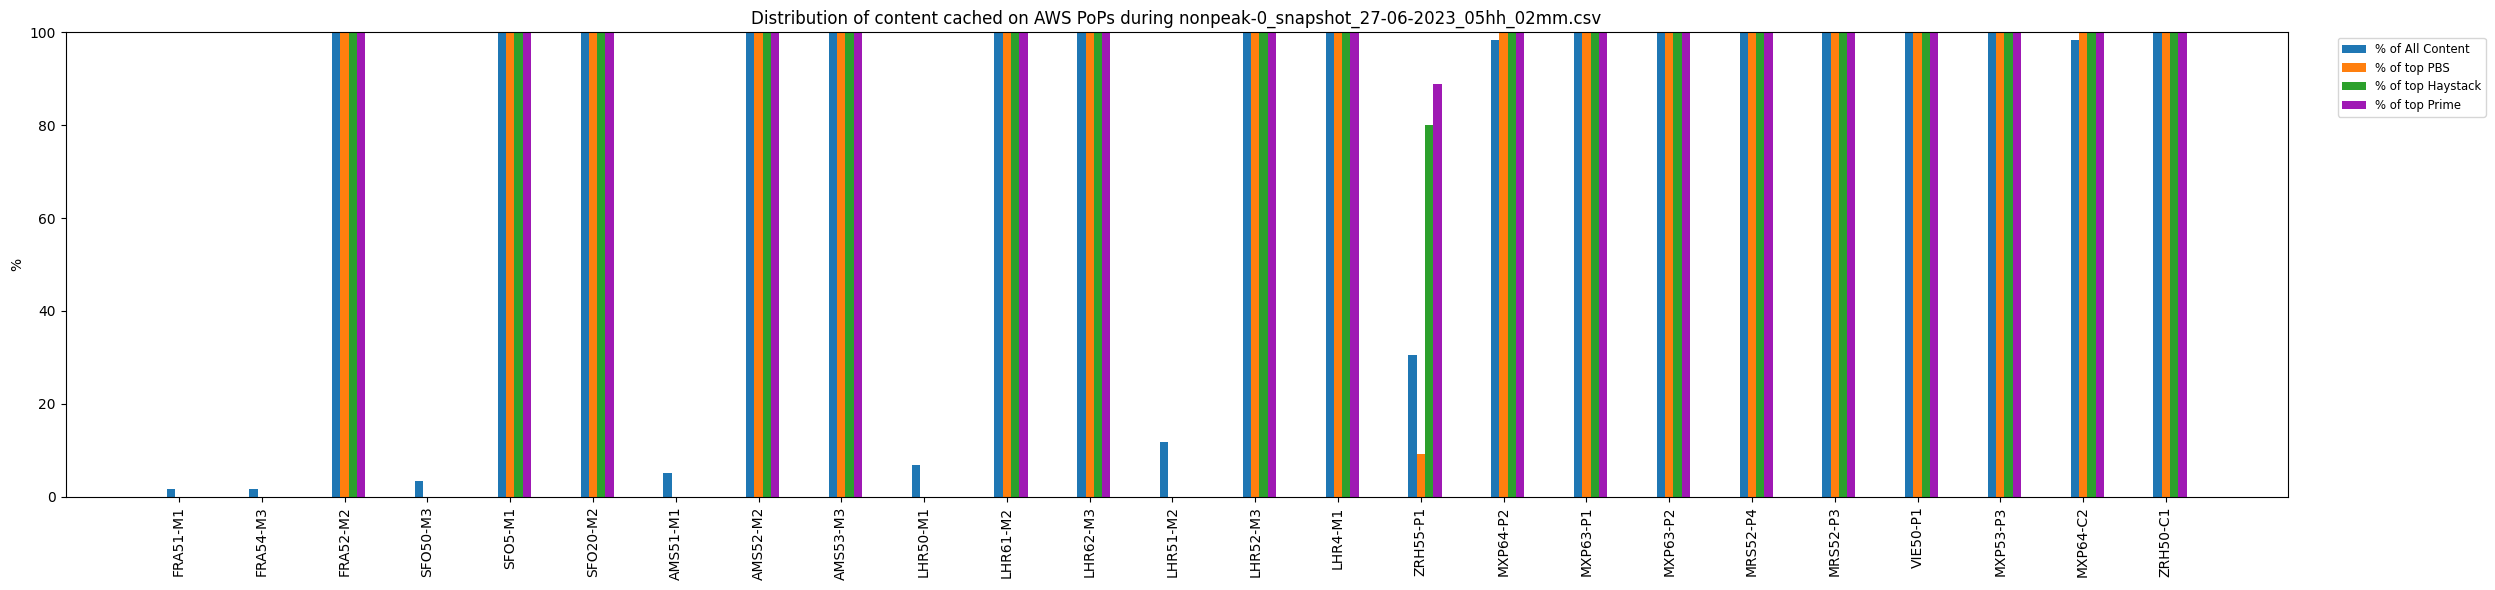

Total: FRA51-M1 18 48 0 18.0  ->  27.27272727272727 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 10 0
Prime: FRA51-M1 0 10 0






Total: FRA54-M3 66 0 0 66.0  ->  100.0 %
PBS: FRA54-M3 11 0 0
Haystack: FRA54-M3 10 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 66 0 0 66.0  ->  100.0 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 10 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 17 49 0 17.0  ->  25.757575757575758 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 10 0
Prime: SFO50-M3 0 10 0






Total: SFO5-M1 66 0 0 66.0  ->  100.0 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 10 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 66 0 0 66.0  ->  100.0 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 10 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 17 49 0 17.0  ->  25.757575757575758 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 10 0
Prime: AMS51-M1 0 10 0






Total: AMS52-M2 66 0 0 66.0  ->  100.0 %
PBS: AMS52-M2 11 0 0
Haystack: AMS52-M2 10 0 0
Prime: AMS52-M2 10 0 0






Total: AMS53-M3 66 0 0 66.0

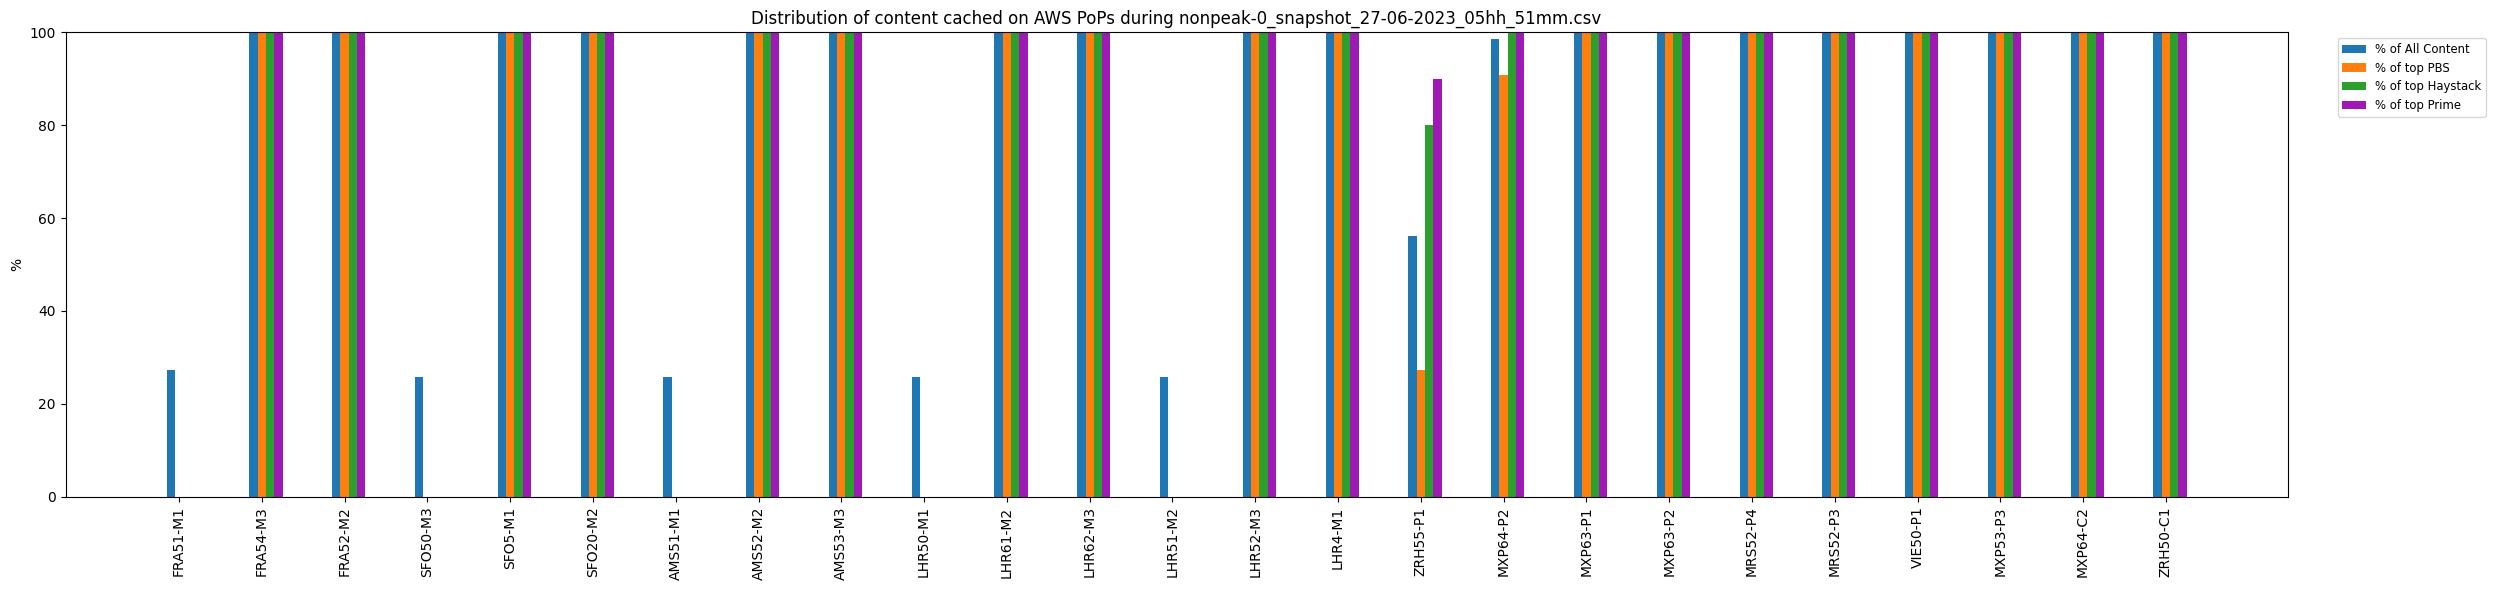

Total: FRA51-M1 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 9 0
Prime: FRA51-M1 0 10 0






Total: FRA54-M3 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: FRA54-M3 11 0 0
Haystack: FRA54-M3 9 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 9 0
Prime: SFO50-M3 0 10 0






Total: SFO5-M1 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 9 0
Prime: AMS51-M1 0 10 0






Total: AMS52-M2 63 0 0 63.0000002  

/tmp/ipykernel_367446/4150554386.py:55: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/4150554386.py:69: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/4150554386.py:86: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/4150554386.py:87: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total2 = (sum1+sum2) * (1/(total_count1 + total_count2)) * 100 ###
/tmp/ipykernel_367446/4150554386.py:102: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100


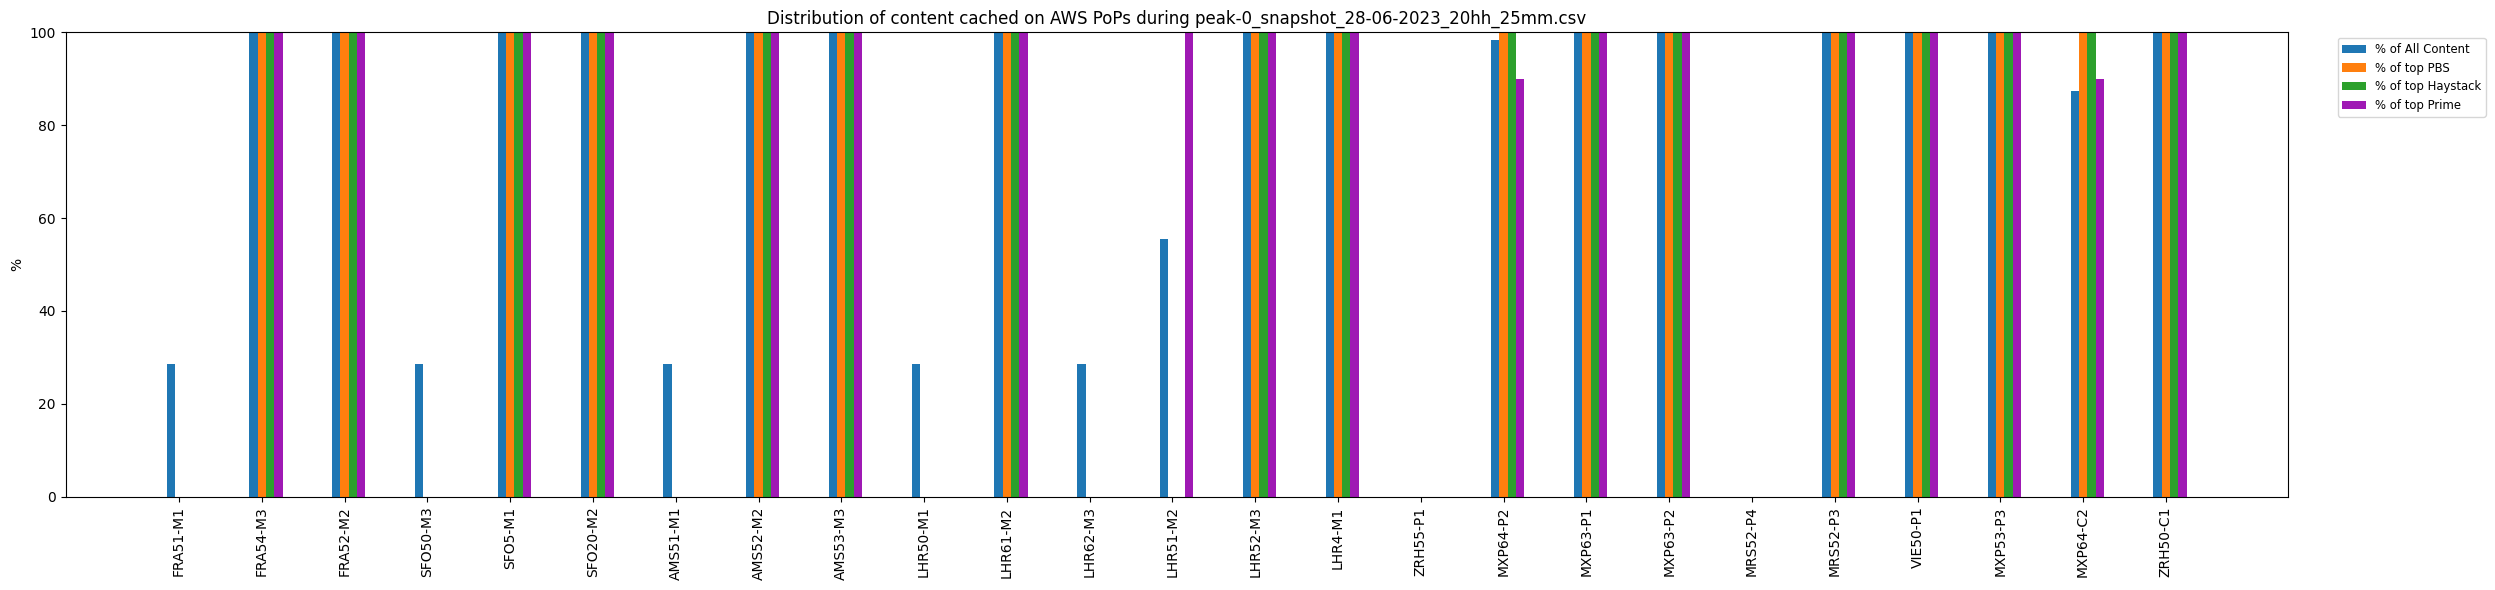

Total: FRA51-M1 19 45 0 19.0000001  ->  29.687500156250003 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 10 0
Prime: FRA51-M1 0 10 0






Total: FRA54-M3 64 0 0 64.0000001  ->  100.00000015625 %
PBS: FRA54-M3 11 0 0
Haystack: FRA54-M3 10 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 10 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 17 47 0 17.0000001  ->  26.562500156250003 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 10 0
Prime: SFO50-M3 0 10 0






Total: SFO5-M1 64 0 0 64.0000001  ->  100.00000015625 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 10 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 10 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 17 47 0 17.0000001  ->  26.562500156250003 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 10 0
Prime: AMS51-M1 0 10 0






Total: AMS52-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS:

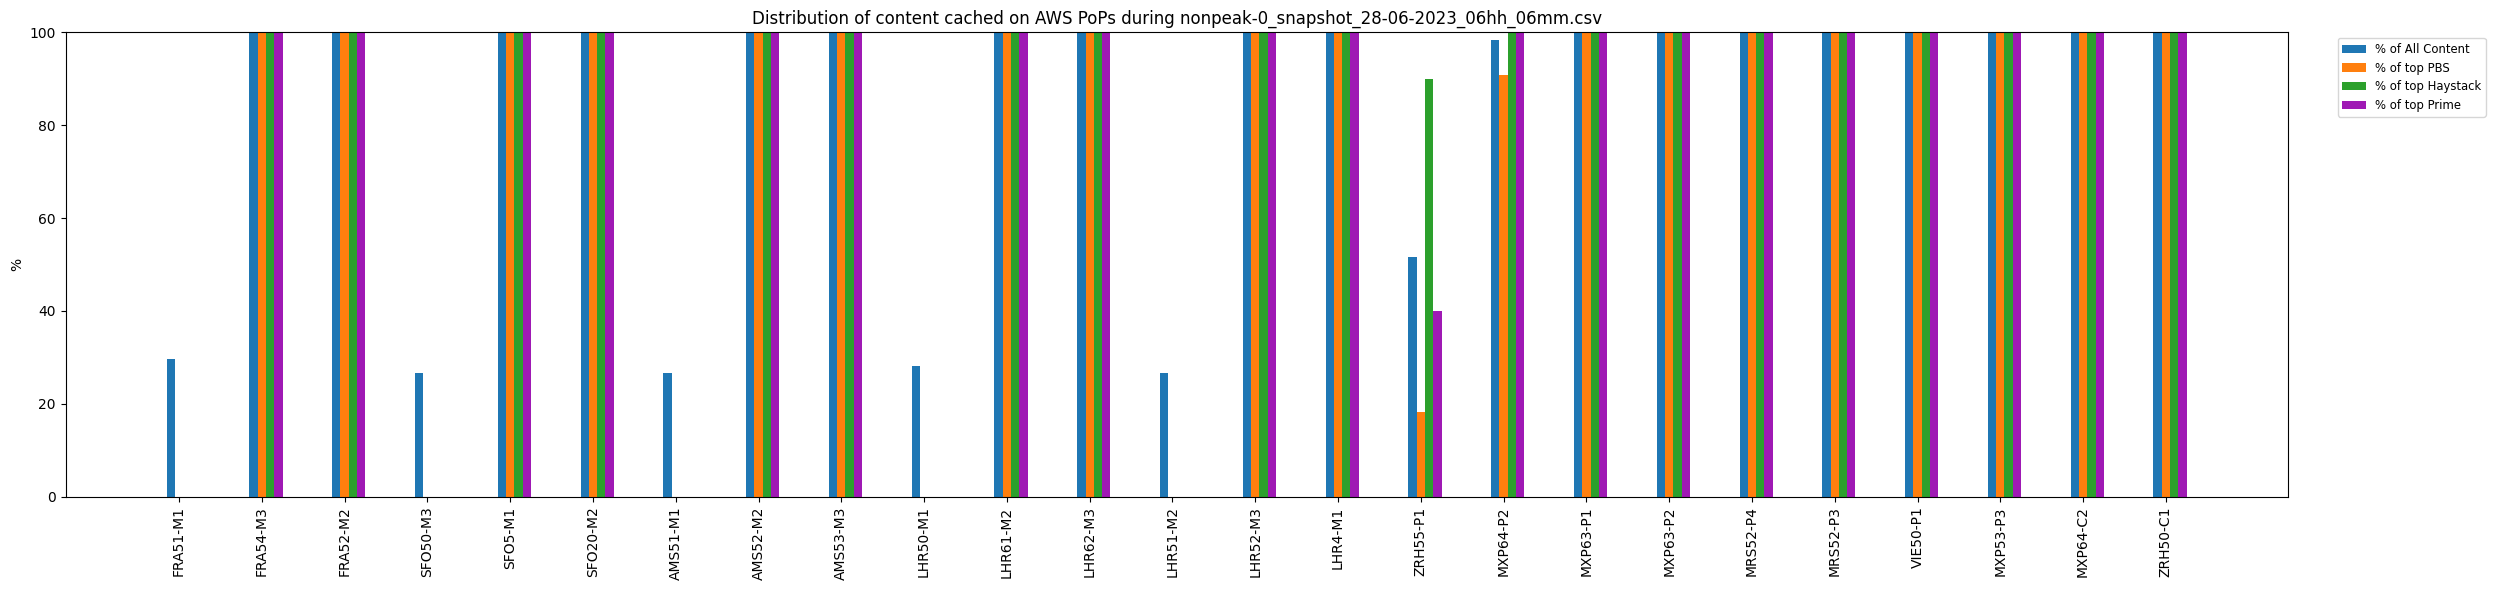

Total: FRA51-M1 18 45 0 18.0000003  ->  28.571429047619045 %
PBS: FRA51-M1 0 11 0
Haystack: FRA51-M1 0 9 0
Prime: FRA51-M1 0 9 0






Total: FRA54-M3 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: FRA54-M3 11 0 0
Haystack: FRA54-M3 9 0 0
Prime: FRA54-M3 9 0 0






Total: FRA52-M2 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: FRA52-M2 11 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 9 0 0






Total: SFO50-M3 17 46 0 17.0000003  ->  26.98412746031746 %
PBS: SFO50-M3 0 11 0
Haystack: SFO50-M3 0 9 0
Prime: SFO50-M3 0 9 0






Total: SFO5-M1 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: SFO5-M1 11 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 9 0 0






Total: SFO20-M2 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: SFO20-M2 11 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 9 0 0






Total: AMS51-M1 17 46 0 17.0000003  ->  26.98412746031746 %
PBS: AMS51-M1 0 11 0
Haystack: AMS51-M1 0 9 0
Prime: AMS51-M1 0 9 0






Total: AMS52-M2 63 0 0 63.0000002

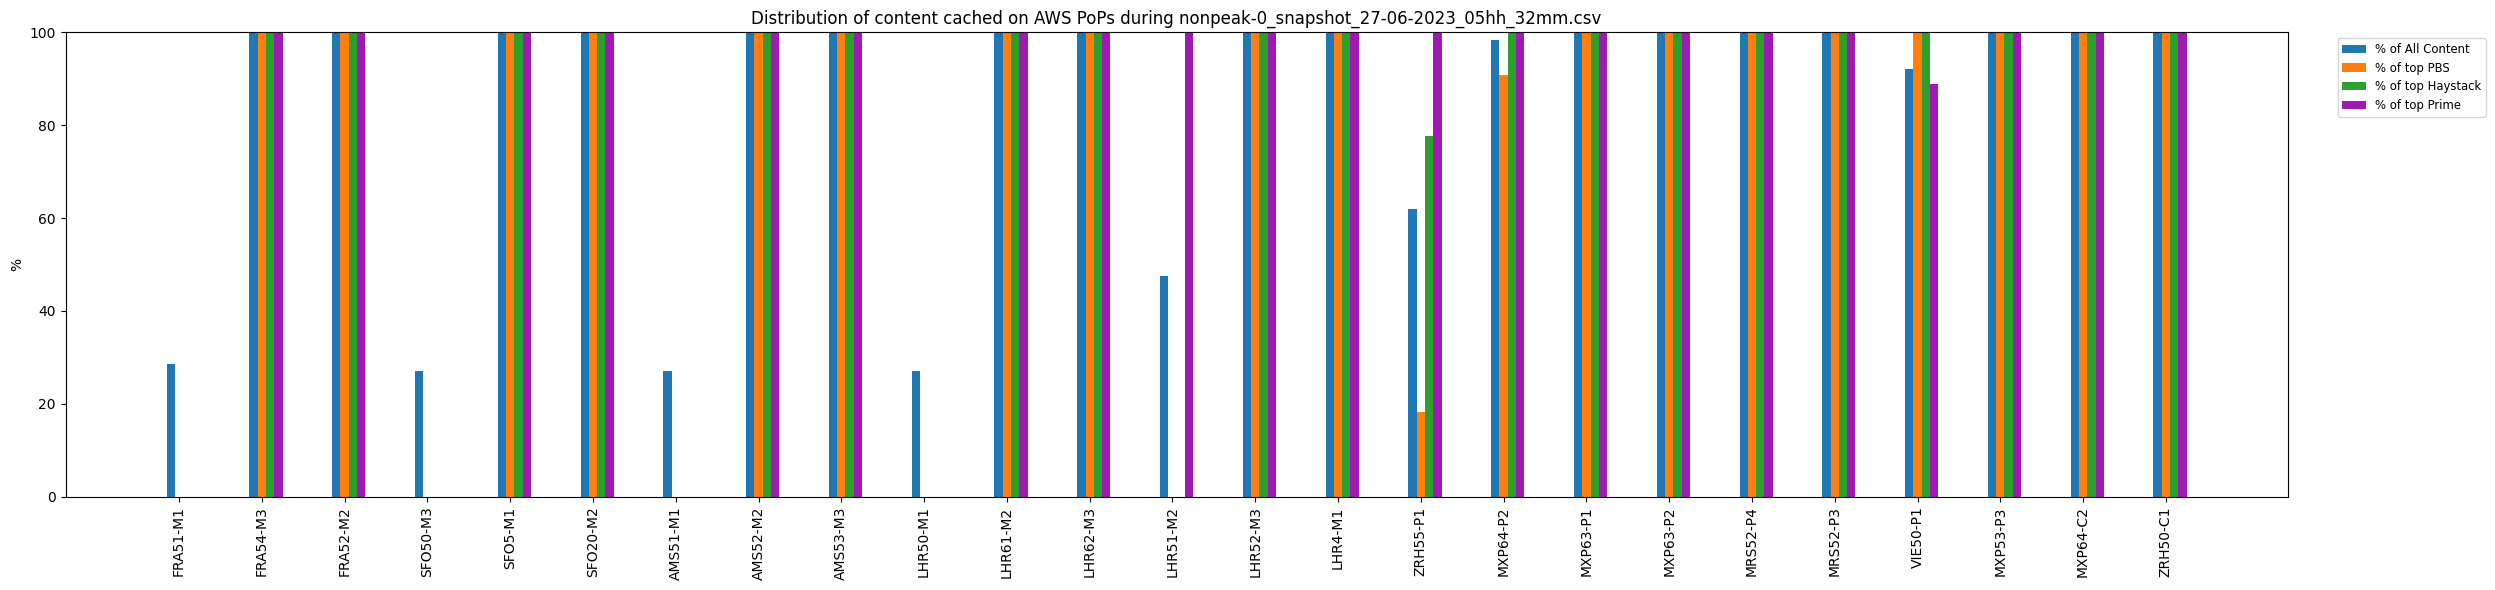

"\ntop10_df = df[df['content'].isin(top_content_list)]\npopular_df = df[df['content'].str.contains('_top_')]\npopular_df = popular_df[~popular_df['content'].isin(top_content_list)]\nnonpopular_df = df[~df['content'].str.contains('_top_|myvideo|_recentlyadded_')]\nmycontent_df = df[df['content'].str.contains('myvideo')]\nrecentlyadded_df = df[df['content'].str.contains('_recentlyadded_')]\n"

In [110]:
### SNAPSHOTS (POPULAR CONTENT)
# Load data into dfs
RESULT_SNAPSHOT_PATH = "./snapshots/"
dfs = []
titles = []
for root, dirs, files in os.walk(RESULT_SNAPSHOT_PATH):
        # root: Current directory being scanned
        # dirs: Directories inside the current directory
        # files: Files inside the current directory
        nonpeaktime_df = pd.DataFrame()
        peak_df = pd.DataFrame()
        for i, file in enumerate(files):
            file_path = os.path.join(root, file)
            if".csv" in file and "old" not in root:
                 df = pd.read_csv(file_path)
                 dfs.append(df)
                 titles.append(file)



#df = nonpeaktime_df
#dfs = [nonpeaktime_df, peak_df]
#titles = ["Non-Peak", "Peak"]
for i, df in enumerate(dfs):
    columns = df.columns[1:]

    # Convert the column data to integers
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0.0000001).astype(float)

    # Initialize lists to store the results
    total = []
    pbs_top10 = []
    haystack_top10 = []
    prime_top10 = []
    ##################
    #prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
    #prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
    #pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
    #pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
    #haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
    #haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
    #mycontent_df = df[df['content'].str.contains('_my_content')]
    #################

    for column in columns:
        # Get the total number of 1s
        #total.append(df[column].sum()*1.52)
        temp_df = df[~df['content'].str.contains('_my_content')]
        zeros_count = (df[column] == 0).sum()
        ones_count = (df[column] == 1).sum()
        empty_count = (df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        total.append(percnt_total)
        print("Total:",column, ones_count, zeros_count, empty_count, sum, " -> ", percnt_total, "%")

        # Get the number of 1s from content containing "top"
        #pbs_top10.append(df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')][column].sum()*9.09)
        temp_df = df[df['content'].str.contains('_pbs_top_')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        sum1 = sum ###
        total_count1 = total_count ###
        percnt_total = sum * (1/total_count) * 100
        pbs_top10.append(percnt_total)
        print("PBS:",column, ones_count, zeros_count, empty_count)
        #pbs_top10.append(df[df['content'].str.contains('_pbs_')][column].sum()*4.76)
        
        # Get the number of 1s from content not containing "top"
        #haystack_top10.append(df[df['content'].str.contains('_haystack_top_')][column].sum()*10)
        #haystack_top10.append(df[df['content'].str.contains('_haystack_')][column].sum()*5)
        del(temp_df)
        temp_df = df[df['content'].str.contains('_haystack_top_')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        sum2 = sum ###
        total_count2 = total_count ###
        percnt_total = sum * (1/total_count) * 100
        percnt_total2 = (sum1+sum2) * (1/(total_count1 + total_count2)) * 100 ###
        haystack_top10.append(percnt_total)
        #haystack_top10.append(percnt_total2)
        print("Haystack:",column, ones_count, zeros_count, empty_count)

        # Get the number of 1s from content not containing "top"
        #prime_top10.append(df[df['content'].str.contains('_haystack_top_')][column].sum()*10)
        #prime_top10.append(df[df['content'].str.contains('_url_')][column].sum()*5)
        del(temp_df)
        temp_df = df[df['content'].str.contains('_url_top')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        prime_top10.append(percnt_total)
        print("Prime:",column, ones_count, zeros_count, empty_count)
        print("\n\n\n\n\n")


    # Plotting the results
    x = range(len(columns))
    labels = ['% of All Content', '% of top PBS', '% of top Haystack', '% of top Prime']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9f19b4']
    width = 0.1

    fig, ax = plt.subplots(figsize=(25, 6))

    ax.bar(x, total, width, color=colors[0], label=labels[0])
    ax.bar([i + width for i in x], pbs_top10, width, color=colors[1], label=labels[1])
    ax.bar([i + 2*width for i in x], haystack_top10, width, color=colors[2], label=labels[2])
    ax.bar([i + 3*width for i in x], prime_top10, width, color=colors[3], label=labels[3])

    #ax.set_xlabel('Columns')
    ax.set_ylabel('%')
    title = titles[i]
    ax.set_title(f'Distribution of content cached on AWS PoPs during {title}')
    ax.set_xticks([i + width for i in x])
    ax.set_xticklabels(columns, rotation='vertical')
    #ax.legend()
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    ax.set_ylim([0, 100])
    plt.show()



'''
top10_df = df[df['content'].isin(top_content_list)]
popular_df = df[df['content'].str.contains('_top_')]
popular_df = popular_df[~popular_df['content'].isin(top_content_list)]
nonpopular_df = df[~df['content'].str.contains('_top_|myvideo|_recentlyadded_')]
mycontent_df = df[df['content'].str.contains('myvideo')]
recentlyadded_df = df[df['content'].str.contains('_recentlyadded_')]
'''

# BEST
# 
# 



Total: FRA51-M1 13 52 0 13.0000001  ->  20.000000153846152 %
PBS: FRA51-M1 2 8 0
Haystack: FRA51-M1 6 4 0
Prime: FRA51-M1 2 7 0






Total: FRA54-M3 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: FRA54-M3 10 0 0
Haystack: FRA54-M3 10 0 0
Prime: FRA54-M3 9 0 0






Total: FRA52-M2 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 10 0 0
Prime: FRA52-M2 9 0 0






Total: SFO50-M3 16 49 0 16.0000001  ->  24.615384769230772 %
PBS: SFO50-M3 3 7 0
Haystack: SFO50-M3 8 2 0
Prime: SFO50-M3 1 8 0






Total: SFO5-M1 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 10 0 0
Prime: SFO5-M1 9 0 0






Total: SFO20-M2 65 0 0 65.0000001  ->  100.00000015384616 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 10 0 0
Prime: SFO20-M2 9 0 0






Total: AMS51-M1 16 49 0 16.0000001  ->  24.615384769230772 %
PBS: AMS51-M1 3 7 0
Haystack: AMS51-M1 8 2 0
Prime: AMS51-M1 1 8 0






Total: AMS52-M2 65 0 0 65.0000001  ->  100.00000015384616 %
PB

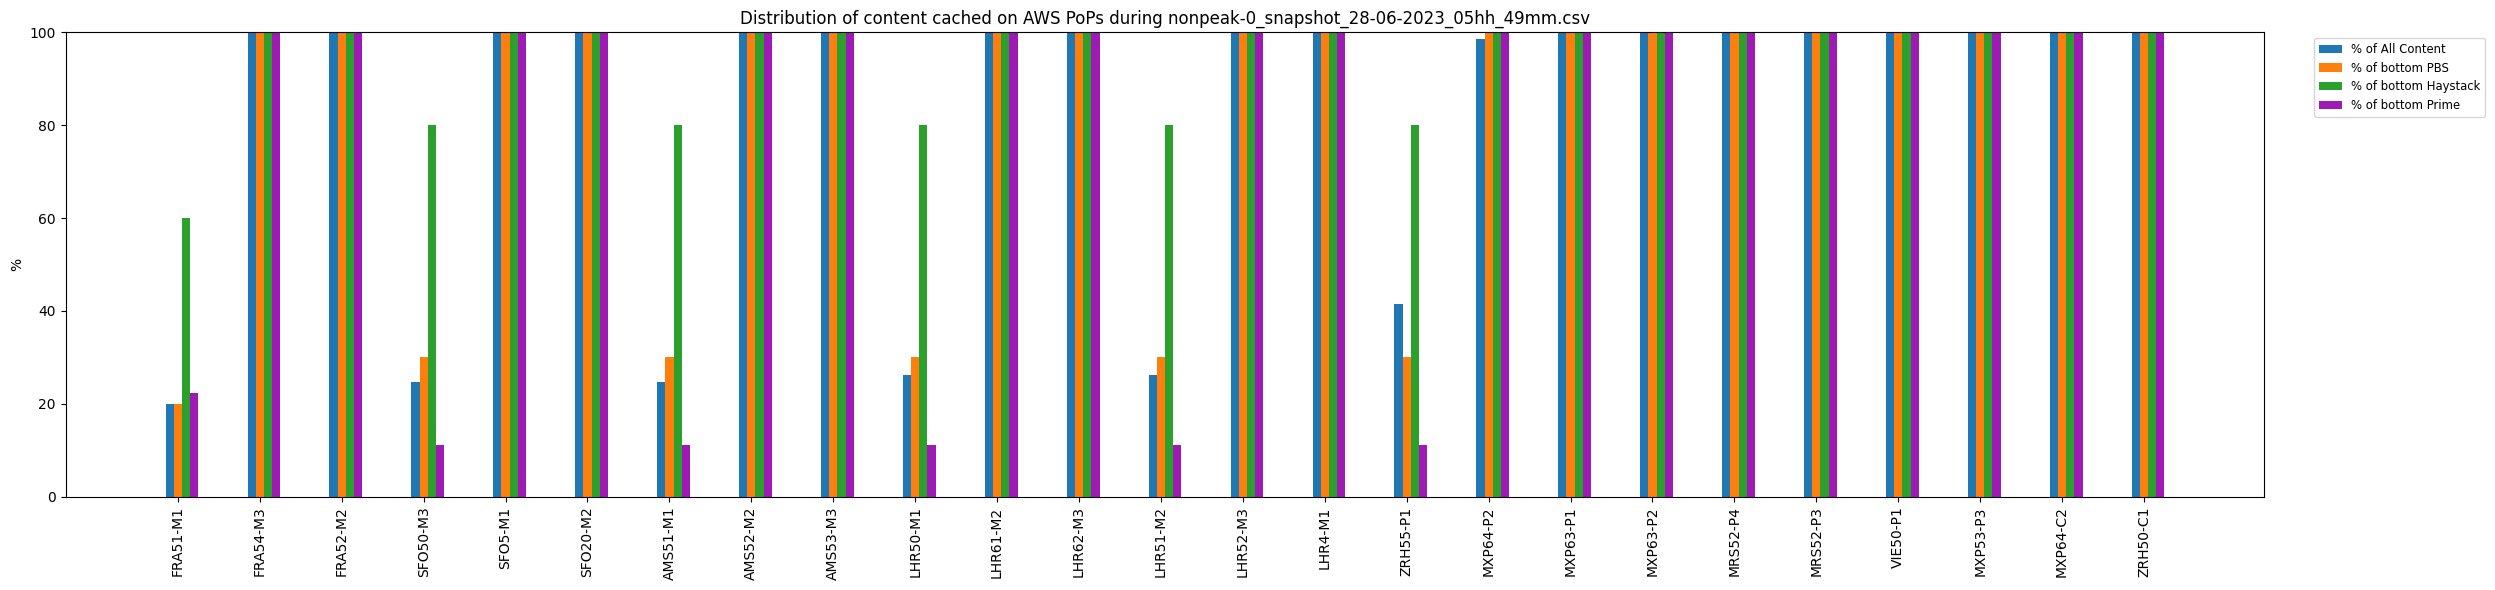

Total: FRA51-M1 1 58 0 1.0000007  ->  1.6949164406779662 %
PBS: FRA51-M1 0 10 0
Haystack: FRA51-M1 0 9 0
Prime: FRA51-M1 0 10 0






Total: FRA54-M3 1 58 0 1.0000007  ->  1.6949164406779662 %
PBS: FRA54-M3 0 10 0
Haystack: FRA54-M3 0 9 0
Prime: FRA54-M3 0 10 0






Total: FRA52-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 2 57 0 2.0000007  ->  3.3898316949152547 %
PBS: SFO50-M3 0 10 0
Haystack: SFO50-M3 0 9 0
Prime: SFO50-M3 0 10 0






Total: SFO5-M1 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 3 56 0 3.0000007  ->  5.084746949152542 %
PBS: AMS51-M1 0 10 0
Haystack: AMS51-M1 0 9 0
Prime: AMS51-M1 1 9 0






Total: AMS52-M2 59 0 0 59.0000007  ->  100.00000118644068 %
PBS: 

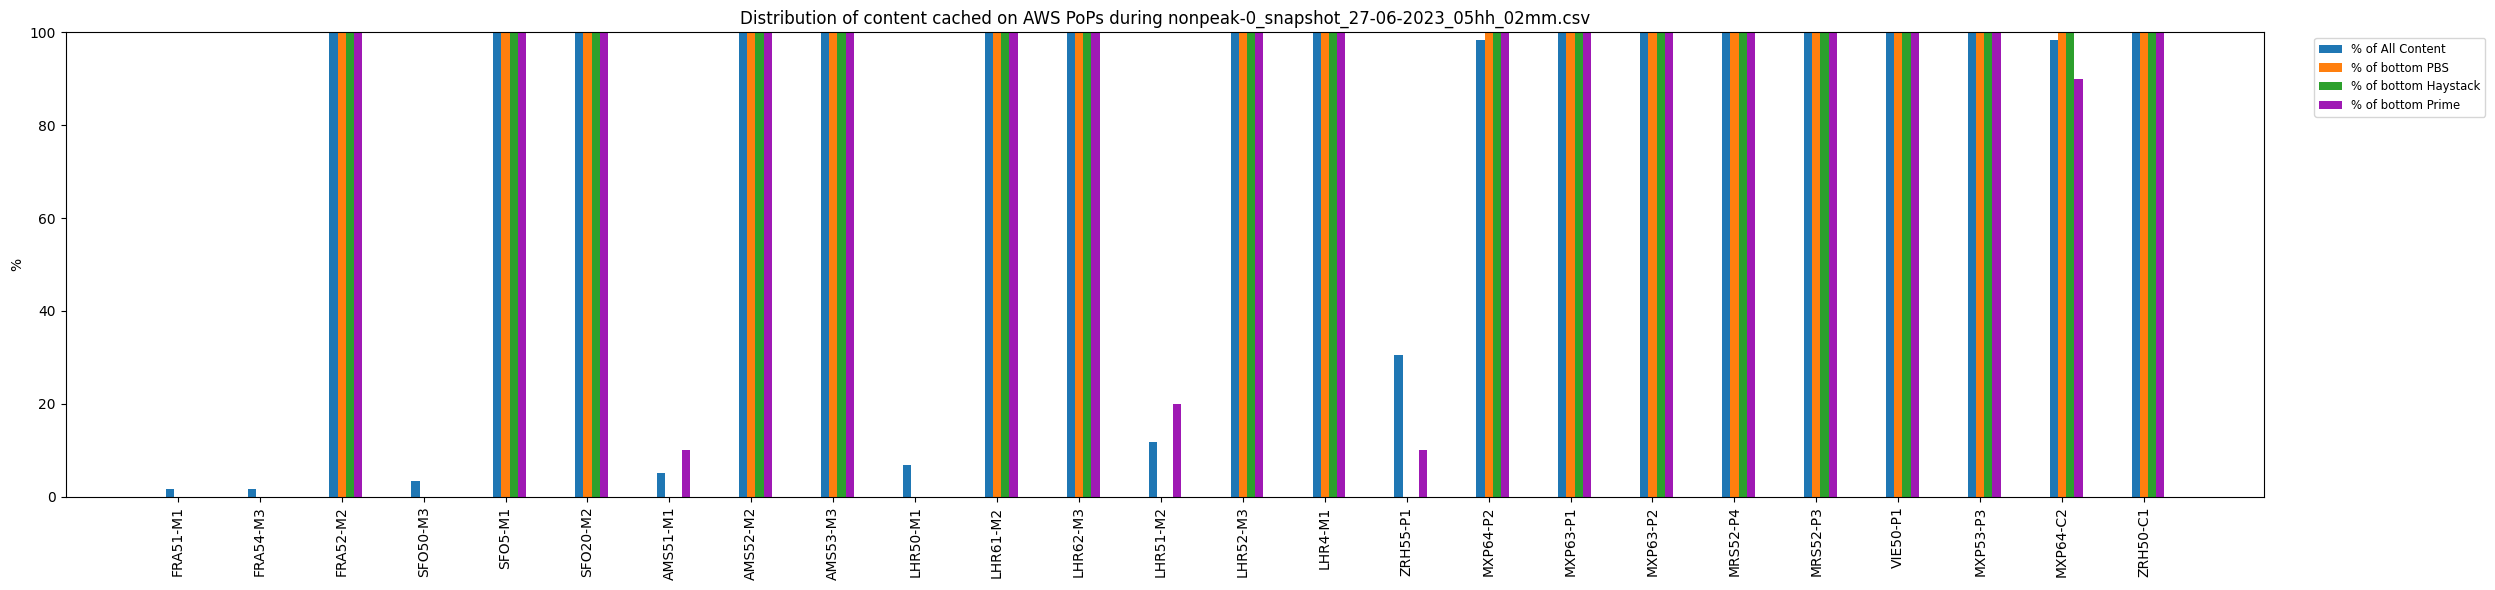

Total: FRA51-M1 18 48 0 18.0  ->  27.27272727272727 %
PBS: FRA51-M1 3 7 0
Haystack: FRA51-M1 8 2 0
Prime: FRA51-M1 2 8 0






Total: FRA54-M3 66 0 0 66.0  ->  100.0 %
PBS: FRA54-M3 10 0 0
Haystack: FRA54-M3 10 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 66 0 0 66.0  ->  100.0 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 10 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 17 49 0 17.0  ->  25.757575757575758 %
PBS: SFO50-M3 3 7 0
Haystack: SFO50-M3 8 2 0
Prime: SFO50-M3 1 9 0






Total: SFO5-M1 66 0 0 66.0  ->  100.0 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 10 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 66 0 0 66.0  ->  100.0 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 10 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 17 49 0 17.0  ->  25.757575757575758 %
PBS: AMS51-M1 3 7 0
Haystack: AMS51-M1 8 2 0
Prime: AMS51-M1 1 9 0






Total: AMS52-M2 66 0 0 66.0  ->  100.0 %
PBS: AMS52-M2 10 0 0
Haystack: AMS52-M2 10 0 0
Prime: AMS52-M2 10 0 0






Total: AMS53-M3 66 0 0 66.0  ->  100

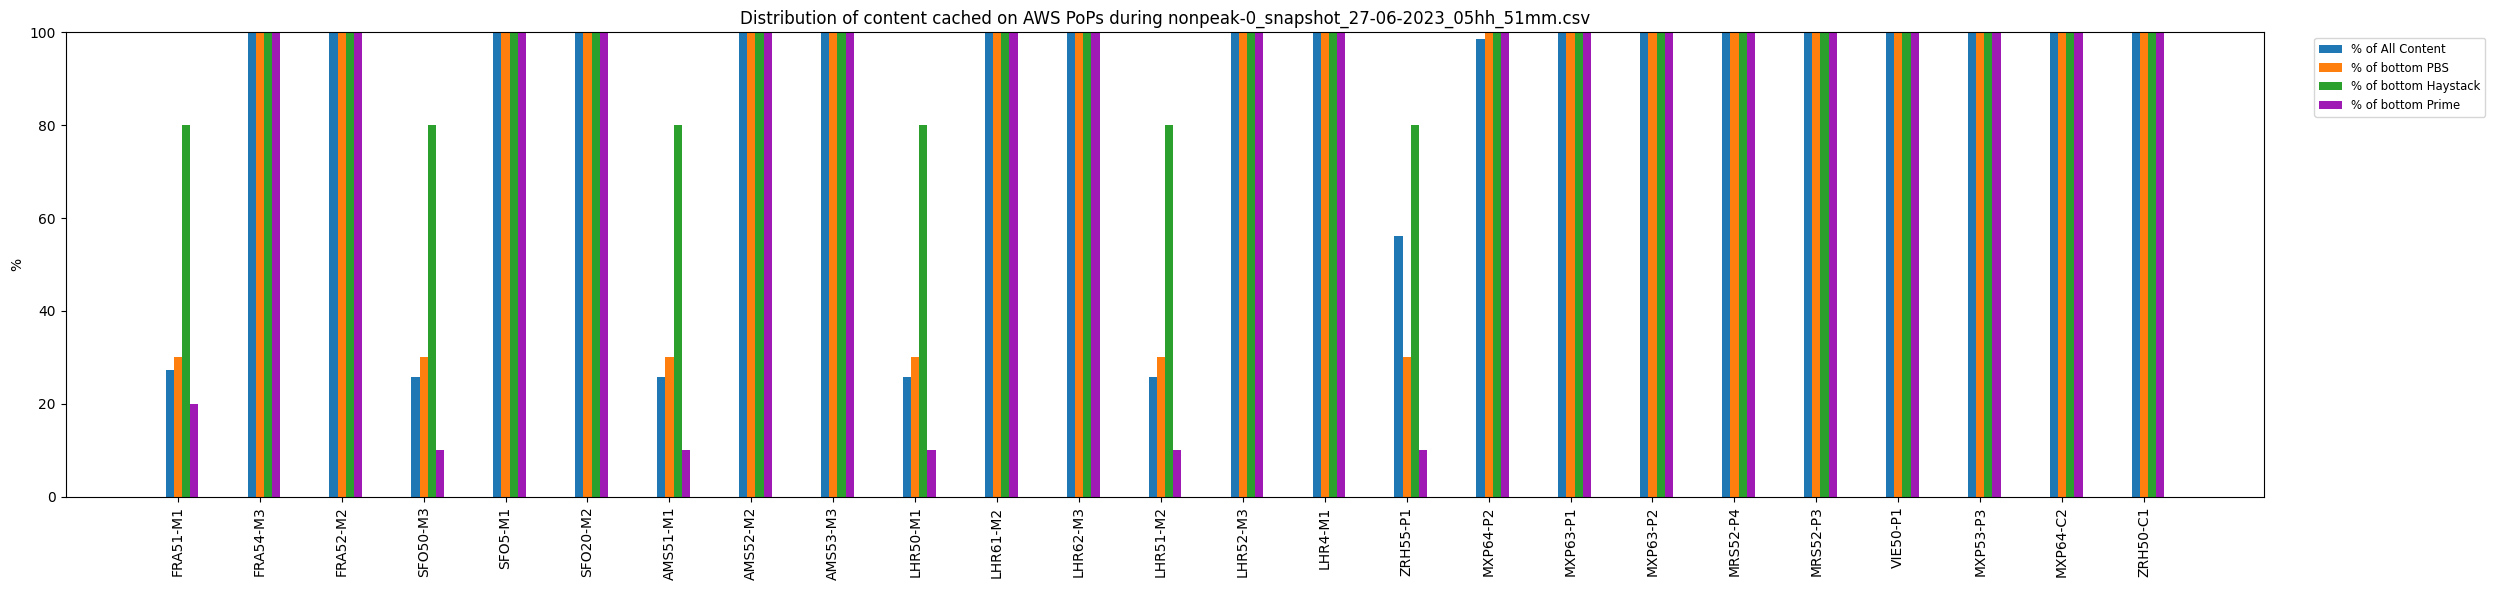

Total: FRA51-M1 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: FRA51-M1 3 7 0
Haystack: FRA51-M1 8 1 0
Prime: FRA51-M1 2 7 0






Total: FRA54-M3 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: FRA54-M3 10 0 0
Haystack: FRA54-M3 9 0 0
Prime: FRA54-M3 9 0 0






Total: FRA52-M2 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 9 0 0






Total: SFO50-M3 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: SFO50-M3 3 7 0
Haystack: SFO50-M3 8 1 0
Prime: SFO50-M3 2 7 0






Total: SFO5-M1 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 9 0 0






Total: SFO20-M2 63 0 0 63.0000002  ->  100.00000031746032 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 9 0 0






Total: AMS51-M1 18 45 0 18.000000200000002  ->  28.57142888888889 %
PBS: AMS51-M1 3 7 0
Haystack: AMS51-M1 8 1 0
Prime: AMS51-M1 2 7 0






Total: AMS52-M2 63 0 0 63.0000002  ->  100.00

/tmp/ipykernel_367446/3144637098.py:55: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/3144637098.py:67: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/3144637098.py:82: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100
/tmp/ipykernel_367446/3144637098.py:96: RuntimeWarning: divide by zero encountered in long_scalars
  percnt_total = sum * (1/total_count) * 100


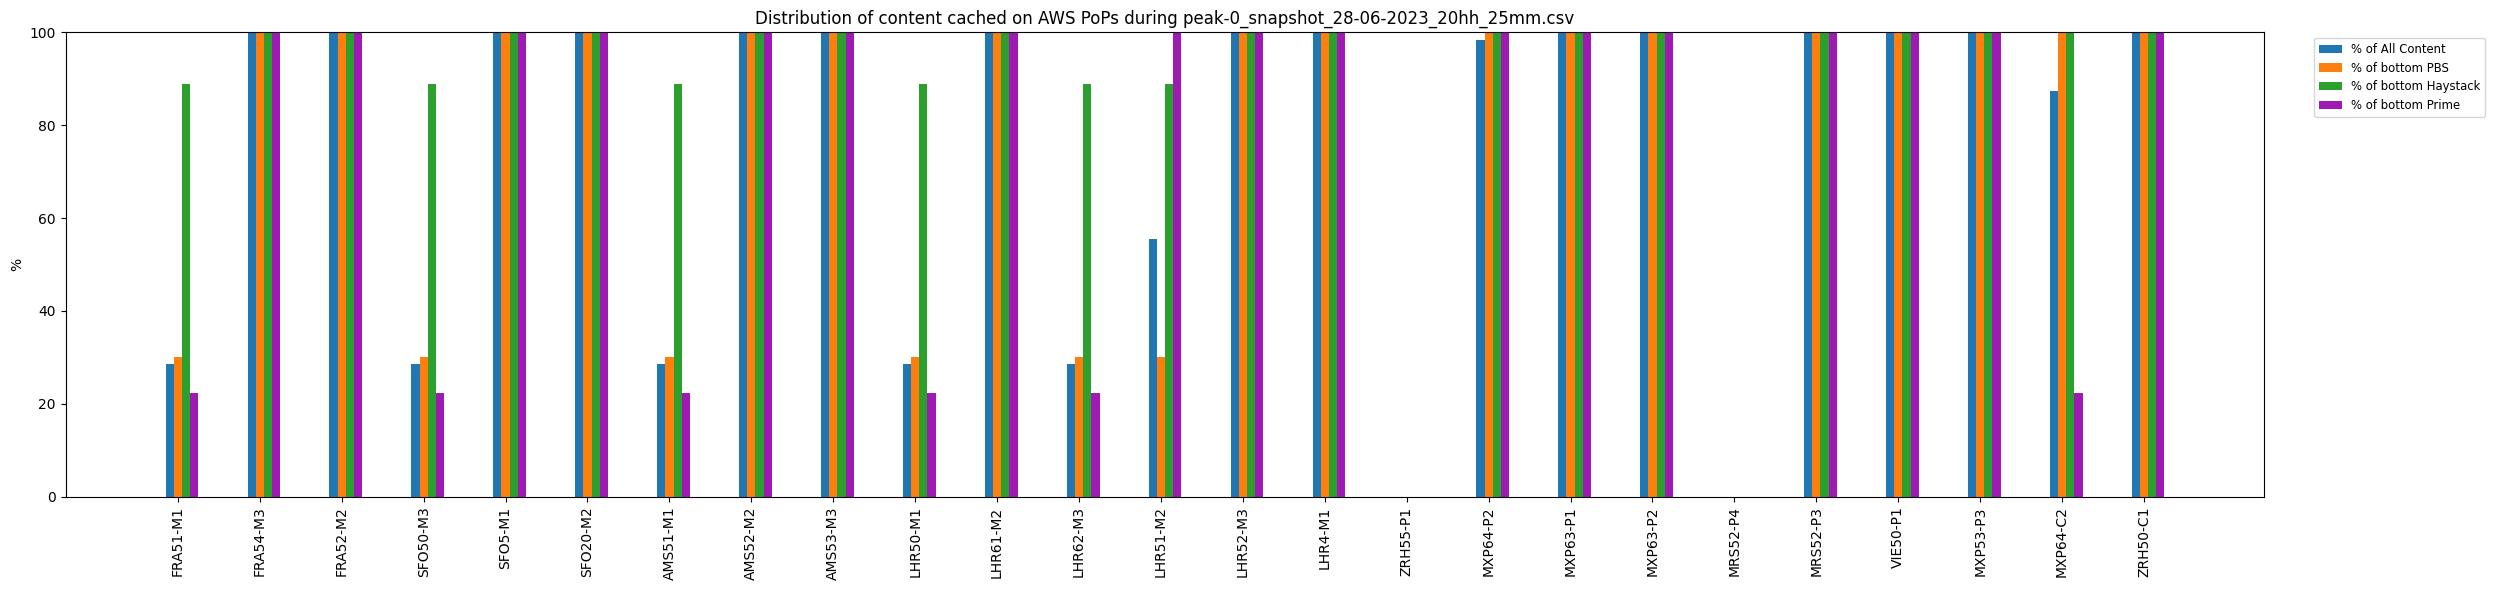

Total: FRA51-M1 19 45 0 19.0000001  ->  29.687500156250003 %
PBS: FRA51-M1 3 7 0
Haystack: FRA51-M1 8 1 0
Prime: FRA51-M1 3 6 0






Total: FRA54-M3 64 0 0 64.0000001  ->  100.00000015625 %
PBS: FRA54-M3 10 0 0
Haystack: FRA54-M3 9 0 0
Prime: FRA54-M3 9 0 0






Total: FRA52-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 9 0 0






Total: SFO50-M3 17 47 0 17.0000001  ->  26.562500156250003 %
PBS: SFO50-M3 3 7 0
Haystack: SFO50-M3 8 1 0
Prime: SFO50-M3 1 8 0






Total: SFO5-M1 64 0 0 64.0000001  ->  100.00000015625 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 9 0 0






Total: SFO20-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 9 0 0






Total: AMS51-M1 17 47 0 17.0000001  ->  26.562500156250003 %
PBS: AMS51-M1 3 7 0
Haystack: AMS51-M1 8 1 0
Prime: AMS51-M1 1 8 0






Total: AMS52-M2 64 0 0 64.0000001  ->  100.00000015625 %
PBS: AMS52-M2 10 0 0


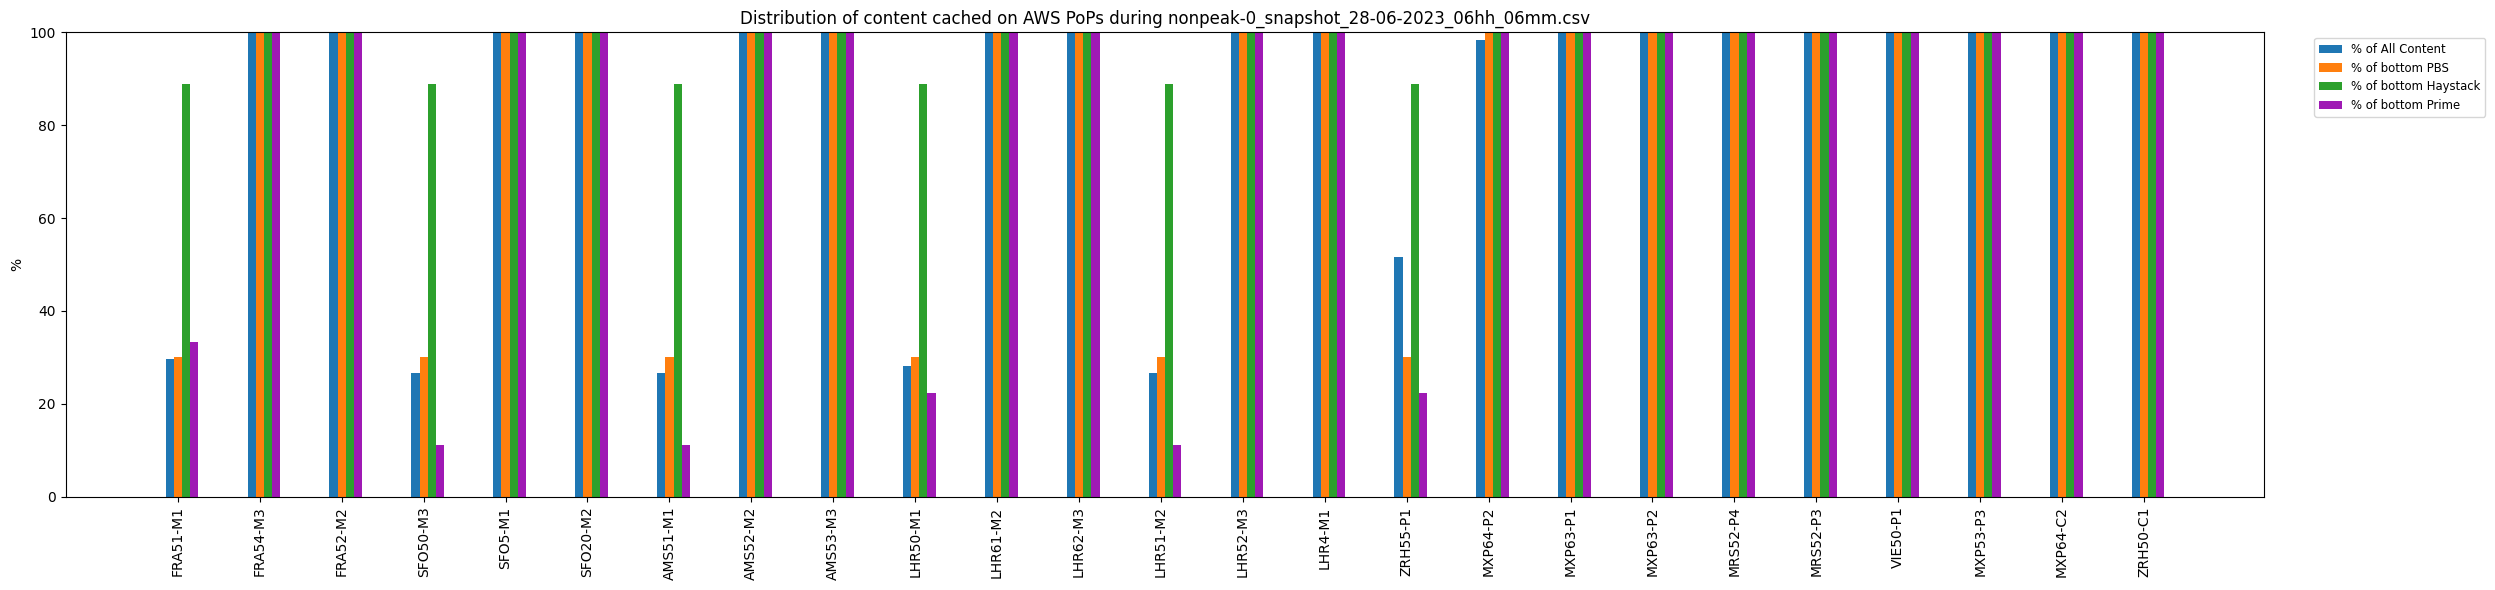

Total: FRA51-M1 18 45 0 18.0000003  ->  28.571429047619045 %
PBS: FRA51-M1 3 7 0
Haystack: FRA51-M1 8 1 0
Prime: FRA51-M1 2 8 0






Total: FRA54-M3 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: FRA54-M3 10 0 0
Haystack: FRA54-M3 9 0 0
Prime: FRA54-M3 10 0 0






Total: FRA52-M2 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: FRA52-M2 10 0 0
Haystack: FRA52-M2 9 0 0
Prime: FRA52-M2 10 0 0






Total: SFO50-M3 17 46 0 17.0000003  ->  26.98412746031746 %
PBS: SFO50-M3 3 7 0
Haystack: SFO50-M3 8 1 0
Prime: SFO50-M3 1 9 0






Total: SFO5-M1 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: SFO5-M1 10 0 0
Haystack: SFO5-M1 9 0 0
Prime: SFO5-M1 10 0 0






Total: SFO20-M2 63 0 0 63.000000299999996  ->  100.00000047619046 %
PBS: SFO20-M2 10 0 0
Haystack: SFO20-M2 9 0 0
Prime: SFO20-M2 10 0 0






Total: AMS51-M1 17 46 0 17.0000003  ->  26.98412746031746 %
PBS: AMS51-M1 3 7 0
Haystack: AMS51-M1 8 1 0
Prime: AMS51-M1 1 9 0






Total: AMS52-M2 63 0 0 63.000000

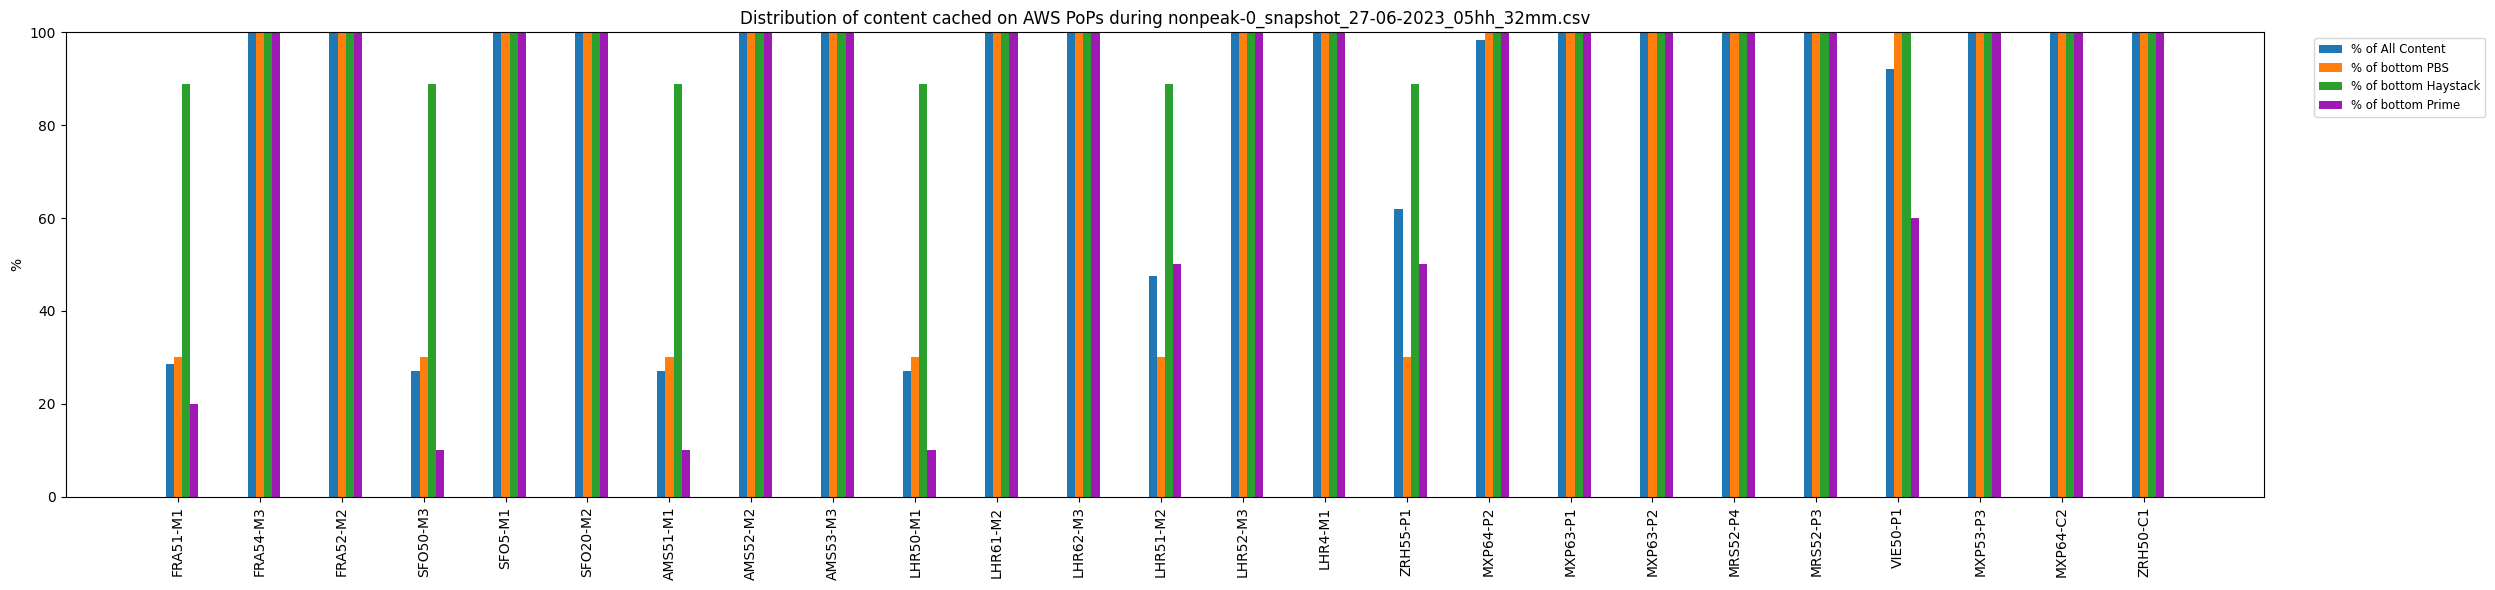

"\ntop10_df = df[df['content'].isin(top_content_list)]\npopular_df = df[df['content'].str.contains('_top_')]\npopular_df = popular_df[~popular_df['content'].isin(top_content_list)]\nnonpopular_df = df[~df['content'].str.contains('_top_|myvideo|_recentlyadded_')]\nmycontent_df = df[df['content'].str.contains('myvideo')]\nrecentlyadded_df = df[df['content'].str.contains('_recentlyadded_')]\n"

In [109]:
### SNAPSHOTS (UNPOPULAR CONTENT)
# Load data into dfs
RESULT_SNAPSHOT_PATH = "./snapshots/"
dfs = []
titles = []
for root, dirs, files in os.walk(RESULT_SNAPSHOT_PATH):
        # root: Current directory being scanned
        # dirs: Directories inside the current directory
        # files: Files inside the current directory
        nonpeaktime_df = pd.DataFrame()
        peak_df = pd.DataFrame()
        for i, file in enumerate(files):
            file_path = os.path.join(root, file)
            if".csv" in file and "old" not in root:
                 df = pd.read_csv(file_path)
                 dfs.append(df)
                 titles.append(file)



#df = nonpeaktime_df
#dfs = [nonpeaktime_df, peak_df]
#titles = ["Non-Peak", "Peak"]
for i, df in enumerate(dfs):
    columns = df.columns[1:]

    # Convert the column data to integers
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0.0000001).astype(float)

    # Initialize lists to store the results
    total = []
    pbs_top10 = []
    haystack_top10 = []
    prime_top10 = []
    ##################
    #prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
    #prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
    #pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
    #pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
    #haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
    #haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]
    #mycontent_df = df[df['content'].str.contains('_my_content')]
    #################

    for column in columns:
        # Get the total number of 1s
        #total.append(df[column].sum()*1.52)
        temp_df = df[~df['content'].str.contains('_my_content')]
        zeros_count = (df[column] == 0).sum()
        ones_count = (df[column] == 1).sum()
        empty_count = (df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        total.append(percnt_total)
        print("Total:",column, ones_count, zeros_count, empty_count, sum, " -> ", percnt_total, "%")

        # Get the number of 1s from content containing "top"
        #pbs_top10.append(df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')][column].sum()*9.09)
        temp_df = df[df['content'].str.contains('_pbs_bottom_')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        pbs_top10.append(percnt_total)
        print("PBS:",column, ones_count, zeros_count, empty_count)
        #pbs_top10.append(df[df['content'].str.contains('_pbs_')][column].sum()*4.76)
        
        # Get the number of 1s from content not containing "top"
        #haystack_top10.append(df[df['content'].str.contains('_haystack_top_')][column].sum()*10)
        #haystack_top10.append(df[df['content'].str.contains('_haystack_')][column].sum()*5)
        del(temp_df)
        temp_df = df[df['content'].str.contains('_haystack_bottom_')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        haystack_top10.append(percnt_total)
        print("Haystack:",column, ones_count, zeros_count, empty_count)

        # Get the number of 1s from content not containing "top"
        #prime_top10.append(df[df['content'].str.contains('_haystack_top_')][column].sum()*10)
        #prime_top10.append(df[df['content'].str.contains('_url_')][column].sum()*5)
        del(temp_df)
        temp_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
        zeros_count = (temp_df[column] == 0).sum()
        ones_count = (temp_df[column] == 1).sum()
        empty_count = (temp_df[column] == -1).sum()
        total_count = zeros_count + ones_count
        sum = temp_df[column].sum()
        percnt_total = sum * (1/total_count) * 100
        prime_top10.append(percnt_total)
        print("Prime:",column, ones_count, zeros_count, empty_count)
        print("\n\n\n\n\n")


    # Plotting the results
    x = range(len(columns))
    labels = ['% of All Content', '% of bottom PBS', '% of bottom Haystack', '% of bottom Prime']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9f19b4']
    width = 0.1

    fig, ax = plt.subplots(figsize=(25, 6))

    ax.bar(x, total, width, color=colors[0], label=labels[0])
    ax.bar([i + width for i in x], pbs_top10, width, color=colors[1], label=labels[1])
    ax.bar([i + 2*width for i in x], haystack_top10, width, color=colors[2], label=labels[2])
    ax.bar([i + 3*width for i in x], prime_top10, width, color=colors[3], label=labels[3])

    #ax.set_xlabel('Columns')
    ax.set_ylabel('%')
    title = titles[i]
    ax.set_title(f'Distribution of content cached on AWS PoPs during {title}')
    ax.set_xticks([i + width for i in x])
    ax.set_xticklabels(columns, rotation='vertical')
    #ax.legend()
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    ax.set_ylim([0, 100])
    plt.show()



'''
top10_df = df[df['content'].isin(top_content_list)]
popular_df = df[df['content'].str.contains('_top_')]
popular_df = popular_df[~popular_df['content'].isin(top_content_list)]
nonpopular_df = df[~df['content'].str.contains('_top_|myvideo|_recentlyadded_')]
mycontent_df = df[df['content'].str.contains('myvideo')]
recentlyadded_df = df[df['content'].str.contains('_recentlyadded_')]
'''

# temp_df = df[~df['content'].str.contains('_my_content')]
# temp_df = df[df['content'].str.contains('_pbs_bottom_')]
# temp_df = df[df['content'].str.contains('_haystack_bottom_')]
# temp_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]


In [148]:
### RESPONSE TIME EXPERIMENT - READ DATA
import pandas as pd
import statistics
import pickle
import os

RESULT_RESPONSETIME_PATH = "./response_times/"

resptime_df = pd.DataFrame()

for root, dirs, files in os.walk(RESULT_RESPONSETIME_PATH):
    print(root, "old" in root)
    for i, file in enumerate(files):
        if file.endswith('.pkl') and "old" not in root:
            print(f"adding {file}\tfrom: {root}")
            file_path = os.path.join(root, file)
            with open(file_path, 'rb') as f:
                df = pickle.load(f)
                resptime_df = pd.concat([resptime_df,df], ignore_index=True)


print(len(resptime_df))

./response_times/ False
./response_times/28-06-2023_17hh_00mm13-224-103-115 False
adding 0_combined_pickle.pkl	from: ./response_times/28-06-2023_17hh_00mm13-224-103-115
19718


prime_top10 : 98.58% (4802)
prime_bottom10 : 98.85% (2259)
pbs_top10 : 12.17% (4149)
pbs_bottom10 : 36.95% (4051)
haystack_top10 : 89.90% (406)
haystack_bottom10 : 98.54% (4051)


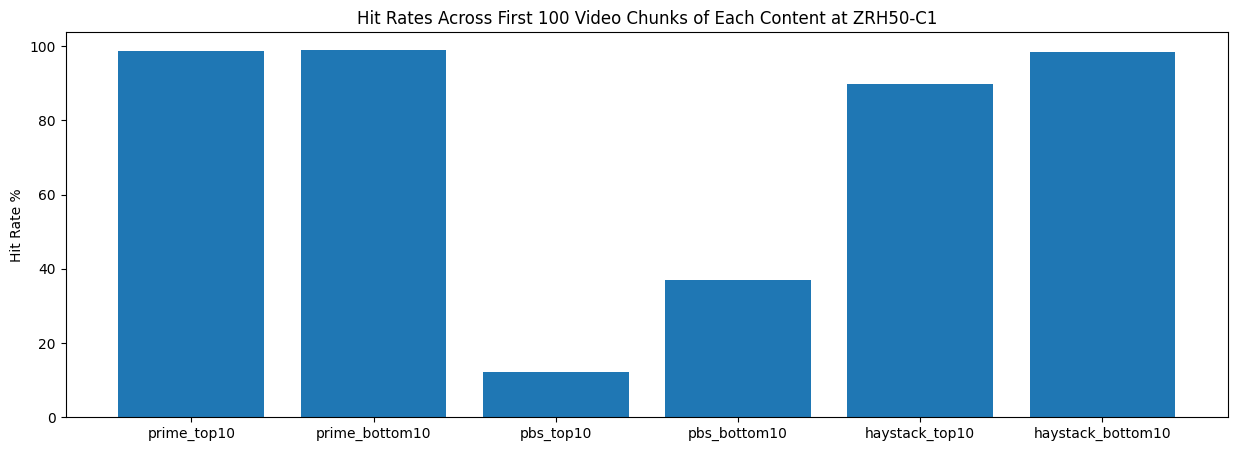

In [198]:
# CHUNK CACHING PERCENTAGE
df = resptime_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]

dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
hit_rates = []
for i, df in enumerate(dfs):
    hit_count = (df['X-Cache'].str.contains('Hit')).sum() / (df['X-Cache'].str.contains('Hit|Miss')).sum() * 100
    print(f"{titles[i]} : {hit_count:.2f}% ({len(df)})")
    hit_rates.append(hit_count)


# Create the bar plot
plt.figure(figsize=(15, 5))
plt.bar(titles, hit_rates)

# Set the labels and title
#plt.xlabel('Numbers')
plt.ylabel('Hit Rate %')
plt.title('Hit Rates Across First 100 Video Chunks of Each Content at ZRH50-C1')

# Display the plot
plt.show()



prime_top10 ['Miss from cloudfront'] 68
prime_bottom10 ['Miss from cloudfront'] 26
pbs_top10 ['Miss from cloudfront'] 3644
pbs_bottom10 ['Miss from cloudfront'] 2554
haystack_top10 ['Miss from cloudfront'] 41
haystack_bottom10 ['Miss from cloudfront'] 59


Avg Response Time:
prime_top10 89.08416777643758
prime_bottom10 112.39123182335439
pbs_top10 513.8355574165379
pbs_bottom10 520.3639987272524
haystack_top10 295.10896993664704
haystack_bottom10 363.386775213057


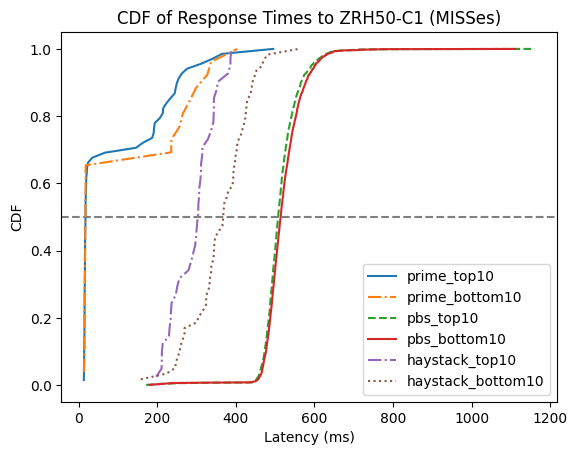

In [232]:
### RESPONSE TIMES (MISS)
df = resptime_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    df.drop(df[~df['X-Cache'].str.contains('Miss', na=False, case=False, regex=False)].index, inplace=True)
    
# Plot the median lines
plt.axhline(0.5, linestyle='--', color='grey')

# Set labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of Response Times to ZRH50-C1 (MISSes)')

x_prime_top10 = np.sort(prime_top10_df['response_time(ms)'])
cdf_prime_top10 = np.arange(1, len(x_prime_top10) + 1) / len(x_prime_top10)
plt.plot(x_prime_top10, cdf_prime_top10, linestyle='-', label='prime_top10')  # Solid line

x_prime_bottom10 = np.sort(prime_bottom10_df['response_time(ms)'])
cdf_prime_bottom10 = np.arange(1, len(x_prime_bottom10) + 1) / len(x_prime_bottom10)
plt.plot(x_prime_bottom10, cdf_prime_bottom10, linestyle='-.', label='prime_bottom10')  # Solid line


x_pbs_top10 = np.sort(pbs_top10_df['response_time(ms)'])
cdf_pbs_top10 = np.arange(1, len(x_pbs_top10) + 1) / len(x_pbs_top10)
plt.plot(x_pbs_top10, cdf_pbs_top10, linestyle='--', label='pbs_top10')  # Solid line

x_pbs_bottom10 = np.sort(pbs_bottom10_df['response_time(ms)'])
cdf_pbs_bottom10 = np.arange(1, len(x_pbs_bottom10) + 1) / len(x_pbs_bottom10)
plt.plot(x_pbs_bottom10, cdf_pbs_bottom10, linestyle='-', label='pbs_bottom10')  # Solid line


x_haystack_top10 = np.sort(haystack_top10_df['response_time(ms)'])
cdf_haystack_top10 = np.arange(1, len(x_haystack_top10) + 1) / len(x_haystack_top10)
plt.plot(x_haystack_top10, cdf_haystack_top10, linestyle='-.', label='haystack_top10')  # Solid line

x_haystack_bottom10 = np.sort(haystack_bottom10_df['response_time(ms)'])
cdf_haystack_bottom10 = np.arange(1, len(x_haystack_bottom10) + 1) / len(x_haystack_bottom10)
plt.plot(x_haystack_bottom10, cdf_haystack_bottom10, linestyle=':', label='haystack_bottom10')  # Solid line

# Show the legend
plt.legend()


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['X-Cache'].unique()
    print(titles[i], x, len(df['X-Cache']))

print("\n\nAvg Response Time:")
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['response_time(ms)'].mean()
    print(titles[i], x)

prime_top10 ['Hit from cloudfront'] 4734
prime_bottom10 ['Hit from cloudfront'] 2233
pbs_top10 ['Hit from cloudfront'] 29
pbs_bottom10 ['Hit from cloudfront'] 1497
haystack_top10 ['Hit from cloudfront'] 365
haystack_bottom10 ['Hit from cloudfront'] 3992


Avg Response Time:
prime_top10 15.67649111698803
prime_bottom10 15.073749031458656
pbs_top10 25.78139502619361
pbs_bottom10 12.953794940823345
haystack_top10 24.706051069987964
haystack_bottom10 12.721829846039888


Avg Response Time:
prime_top10
Mean:15.67649111698803	Min:9.698059875518084	Max:175.8740411605686




prime_bottom10
Mean:15.073749031458656	Min:9.980794042348862	Max:134.10611310973763




pbs_top10
Mean:25.78139502619361	Min:20.504919113591317	Max:41.65910091251135




pbs_bottom10
Mean:12.953794940823345	Min:9.292852832004428	Max:80.77861787751317




haystack_top10
Mean:24.706051069987964	Min:15.076934127137063	Max:94.73095508292316




haystack_bottom10
Mean:12.721829846039888	Min:9.029950946569445	Max:89.092742884531

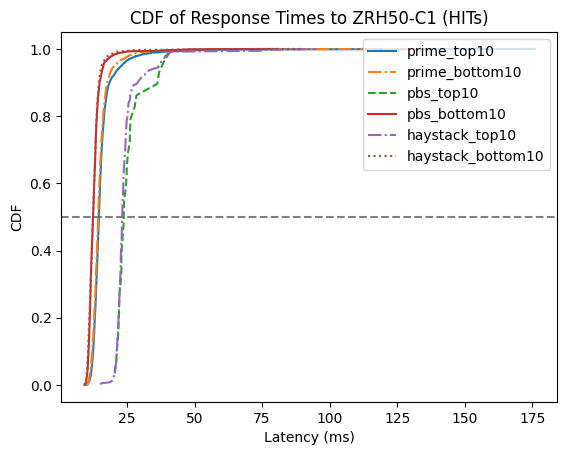

In [241]:
### RESPONSE TIMES (HITS)
df = resptime_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    df.drop(df[df['X-Cache'].str.contains('Miss', na=False, case=False, regex=False)].index, inplace=True)
    df.drop(df[df['X-Cache'].str.contains('RefreshHit', na=False, case=False, regex=False)].index, inplace=True)

# Plot the median lines
plt.axhline(0.5, linestyle='--', color='grey')

# Set labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of Response Times to ZRH50-C1 (HITs)')

x_prime_top10 = np.sort(prime_top10_df['response_time(ms)'])
cdf_prime_top10 = np.arange(1, len(x_prime_top10) + 1) / len(x_prime_top10)
plt.plot(x_prime_top10, cdf_prime_top10, linestyle='-', label='prime_top10')  # Solid line

x_prime_bottom10 = np.sort(prime_bottom10_df['response_time(ms)'])
cdf_prime_bottom10 = np.arange(1, len(x_prime_bottom10) + 1) / len(x_prime_bottom10)
plt.plot(x_prime_bottom10, cdf_prime_bottom10, linestyle='-.', label='prime_bottom10')  # Solid line


x_pbs_top10 = np.sort(pbs_top10_df['response_time(ms)'])
cdf_pbs_top10 = np.arange(1, len(x_pbs_top10) + 1) / len(x_pbs_top10)
plt.plot(x_pbs_top10, cdf_pbs_top10, linestyle='--', label='pbs_top10')  # Solid line

x_pbs_bottom10 = np.sort(pbs_bottom10_df['response_time(ms)'])
cdf_pbs_bottom10 = np.arange(1, len(x_pbs_bottom10) + 1) / len(x_pbs_bottom10)
plt.plot(x_pbs_bottom10, cdf_pbs_bottom10, linestyle='-', label='pbs_bottom10')  # Solid line


x_haystack_top10 = np.sort(haystack_top10_df['response_time(ms)'])
cdf_haystack_top10 = np.arange(1, len(x_haystack_top10) + 1) / len(x_haystack_top10)
plt.plot(x_haystack_top10, cdf_haystack_top10, linestyle='-.', label='haystack_top10')  # Solid line

x_haystack_bottom10 = np.sort(haystack_bottom10_df['response_time(ms)'])
cdf_haystack_bottom10 = np.arange(1, len(x_haystack_bottom10) + 1) / len(x_haystack_bottom10)
plt.plot(x_haystack_bottom10, cdf_haystack_bottom10, linestyle=':', label='haystack_bottom10')  # Solid line

## Set the legend position
plt.legend(loc='upper right')


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['X-Cache'].unique()
    print(titles[i], x, len(df['X-Cache']))

print("\n\nAvg Response Time:")
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['response_time(ms)'].mean()
    print(titles[i], x)



print("\n\nAvg Response Time:")
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    print(titles[i])
    mean_value = df['response_time(ms)'].mean()
    median_value = df['response_time(ms)'].median()
    min_value = df['response_time(ms)'].min()
    max_value = df['response_time(ms)'].max()
    confidence_interval = df['response_time(ms)'].agg(lambda x: list(np.percentile(x, [5, 95])))
    print(f"Mean:{mean_value}\tMin:{min_value}\tMax:{max_value}")
    #print("90% Confidence Interval:", confidence_interval)
    print("\n\n\n")

prime_top10 [] 0
prime_bottom10 [] 0
pbs_top10 ['RefreshHit from cloudfront'] 476
pbs_bottom10 [] 0
haystack_top10 [] 0
haystack_bottom10 [] 0


Avg Response Time:
prime_top10 nan
prime_bottom10 nan
pbs_top10 421.97482660755185
pbs_bottom10 nan
haystack_top10 nan
haystack_bottom10 nan


Avg Response Time:
prime_top10
Mean:nan	Min:nan	Max:nan



prime_bottom10
Mean:nan	Min:nan	Max:nan



pbs_top10
Mean:421.97482660755185	Min:122.96186806634068	Max:537.4821401201189



pbs_bottom10
Mean:nan	Min:nan	Max:nan



haystack_top10
Mean:nan	Min:nan	Max:nan



haystack_bottom10
Mean:nan	Min:nan	Max:nan





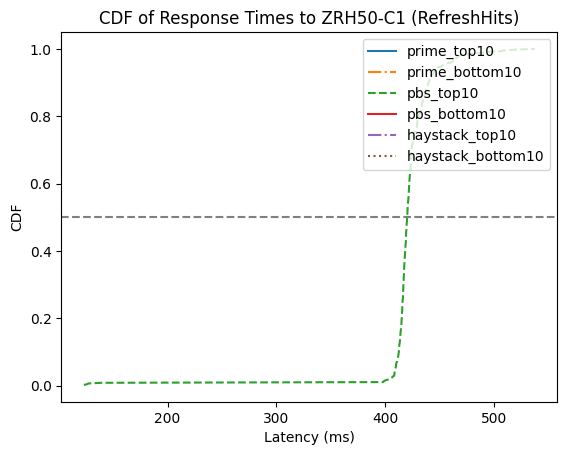

In [237]:
### RESPONSE TIMES (RefreshHits)
df = resptime_df
prime_top10_df = df[df['content'].str.contains('_top_movies|_top_tv')]
prime_bottom10_df = df[df['content'].str.contains('_url_') & ~df['content'].str.contains('_top_movies|_top_tv')]
pbs_top10_df = df[df['content'].str.contains('_pbs_top_')]
pbs_bottom10_df = df[df['content'].str.contains('_pbs_bottom_')]
haystack_top10_df = df[df['content'].str.contains('_haystack_top_')]
haystack_bottom10_df = df[df['content'].str.contains('_haystack_bottom_')]


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    #df.drop(df[~df['X-Cache'].str.contains('RefreshHit', na=False, case=False, regex=False) & ~df['X-Cache'].str.contains('Hit', na=False, case=False, regex=False) & ~df['X-Cache'].str.contains('Miss', na=False, case=False, regex=False)].index, inplace=True)
    df.drop(df[~df['X-Cache'].str.contains('RefreshHit', na=False, case=False, regex=False)].index, inplace=True)

    

# Plot the median lines
plt.axhline(0.5, linestyle='--', color='grey')

# Set labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of Response Times to ZRH50-C1 (RefreshHits)')

x_prime_top10 = np.sort(prime_top10_df['response_time(ms)'])
cdf_prime_top10 = np.arange(1, len(x_prime_top10) + 1) / len(x_prime_top10)
plt.plot(x_prime_top10, cdf_prime_top10, linestyle='-', label='prime_top10')  # Solid line

x_prime_bottom10 = np.sort(prime_bottom10_df['response_time(ms)'])
cdf_prime_bottom10 = np.arange(1, len(x_prime_bottom10) + 1) / len(x_prime_bottom10)
plt.plot(x_prime_bottom10, cdf_prime_bottom10, linestyle='-.', label='prime_bottom10')  # Solid line


x_pbs_top10 = np.sort(pbs_top10_df['response_time(ms)'])
cdf_pbs_top10 = np.arange(1, len(x_pbs_top10) + 1) / len(x_pbs_top10)
plt.plot(x_pbs_top10, cdf_pbs_top10, linestyle='--', label='pbs_top10')  # Solid line

x_pbs_bottom10 = np.sort(pbs_bottom10_df['response_time(ms)'])
cdf_pbs_bottom10 = np.arange(1, len(x_pbs_bottom10) + 1) / len(x_pbs_bottom10)
plt.plot(x_pbs_bottom10, cdf_pbs_bottom10, linestyle='-', label='pbs_bottom10')  # Solid line


x_haystack_top10 = np.sort(haystack_top10_df['response_time(ms)'])
cdf_haystack_top10 = np.arange(1, len(x_haystack_top10) + 1) / len(x_haystack_top10)
plt.plot(x_haystack_top10, cdf_haystack_top10, linestyle='-.', label='haystack_top10')  # Solid line

x_haystack_bottom10 = np.sort(haystack_bottom10_df['response_time(ms)'])
cdf_haystack_bottom10 = np.arange(1, len(x_haystack_bottom10) + 1) / len(x_haystack_bottom10)
plt.plot(x_haystack_bottom10, cdf_haystack_bottom10, linestyle=':', label='haystack_bottom10')  # Solid line

## Set the legend position
plt.legend(loc='upper right')


dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['X-Cache'].unique()
    print(titles[i], x, len(df['X-Cache']))

print("\n\nAvg Response Time:")
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    x = df['response_time(ms)'].mean()
    print(titles[i], x)

print("\n\nAvg Response Time:")
dfs = [prime_top10_df, prime_bottom10_df, pbs_top10_df, pbs_bottom10_df, haystack_top10_df, haystack_bottom10_df]
titles = ['prime_top10', 'prime_bottom10', 'pbs_top10', 'pbs_bottom10', 'haystack_top10', 'haystack_bottom10']
for i, df in enumerate(dfs):
    print(titles[i])
    mean_value = df['response_time(ms)'].mean()
    median_value = df['response_time(ms)'].median()
    min_value = df['response_time(ms)'].min()
    max_value = df['response_time(ms)'].max()
    confidence_interval = df['response_time(ms)'].agg(lambda x: list(np.percentile(x, [5, 95])))
    print(f"Mean:{mean_value}\tMin:{min_value}\tMax:{max_value}")
    #print("90% Confidence Interval:", confidence_interval)
    print("\n\n")